# Data Analysis & Visualisation According to FAIR Principles

### **Workshop session for the NDFI4Biodiversity Seasonal School 2024 by [Dr Cédric Scherer](https://cedricscherer.com)**

This session illustrates a typical workflow when analysing and visualizing a data set as part of the data science workflow. For most examples, we are going to use packages and functions from the so-called [**{tidyverse}** package collection](https://www.tidyverse.org/) that are tailored to modern data science workflows in R.

## Import the Data

The following examples only work when the data is stored locally. Thus, the respective codes are "commented" (by using a `#` at the begin of the line).

In [1]:
# trydb <- read.csv("data/try_reduced.csv")
# gbif <- read.csv("data/gbif1.csv")

As we adhere to the concepts of tidy data, we use the functionality provided by the **`{readr}`** package that returns a `tibble`, the `{tidyverse}` version of the `data.frame`. 

Here, we use the namespace, the double-colon `::`, to access functions from specific packages. This allows us to use the functions (i) without loading the library, (ii) without conflicts (it may happen that functions from different packages have the same name), and (iii) indicate the package a function is imported by.

The `{readr}` package provides tidy import functions; the `{here}` package allows us to navigate securely between directories.

In [2]:
# trydb <- readr::read_csv(here::here("data", "try_reduced.csv"))
# gbif <- readr::read_csv(here::here("data", "gbif1.csv"))

Instead of using the namespace connotation, we can also load the pakcages (by running `library(packagename)`):

In [3]:
# library(readr)
# library(here)
#  
# trydb <- read_csv(here("data", "try_reduced.csv"))
# gbif <- read_csv(here("data", "gbif1.csv"))

We can also import data from an URL:

In [4]:
library(readr)

trydb <- read_csv("https://raw.githubusercontent.com/NFDI4Biodiversity/SeasonalSchool2024/refs/heads/main/day4/practical_session4/data/try_reduced.csv")
gbif <- read_csv("https://raw.githubusercontent.com/NFDI4Biodiversity/SeasonalSchool2024/refs/heads/main/day4/practical_session4/data/gbif1.csv")

New names:
• `` -> `...1`
Rows: 52323 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): SpeciesName, TraitName, UnitName
dbl (2): ...1, StdValue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 255873 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): class, scientificName, countryCode, species
dbl (2): x, y

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Inspect the Data

To get an quick overview of the columns, their types, and the entries, we can use the `glimpse()` function from the **`{dplyr}`** package (more on the package itself will follow a bit later).

In [5]:
dplyr::glimpse(trydb)

Rows: 52,323
Columns: 5
$ ...1        <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,…
$ SpeciesName <chr> "Castanea sativa", "Fagus sylvatica", "Larix decidua", "Pi…
$ TraitName   <chr> "Seed dry mass", "Seed dry mass", "Seed dry mass", "Seed d…
$ StdValue    <dbl> 1433.000000, 158.000000, 6.244000, 2.940000, 6.190000, 190…
$ UnitName    <chr> "mg", "mg", "mg", "mg", "mg", "mg", "mg", "mg", "mg", "g/c…


Let's clean the column names. Here, the **`{janitor}`** provides a neat function to create lower-case, snake-case column names:

In [6]:
trydb <- janitor::clean_names(trydb)
dplyr::glimpse(trydb)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


Rows: 52,323
Columns: 5
$ x1           <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ species_name <chr> "Castanea sativa", "Fagus sylvatica", "Larix decidua", "P…
$ trait_name   <chr> "Seed dry mass", "Seed dry mass", "Seed dry mass", "Seed …
$ std_value    <dbl> 1433.000000, 158.000000, 6.244000, 2.940000, 6.190000, 19…
$ unit_name    <chr> "mg", "mg", "mg", "mg", "mg", "mg", "mg", "mg", "mg", "g/…


Let's calculate some basic, descriptive insights and stattistics using base R functionality:

In [7]:
unique(trydb$unit_name)

[1] "mg"       "g/cm3"    "mg/g"     "g/g"      "per mill" "m"       
 [7] "mm2"      "number"   "mm2 mg-1" "g m-2"    "mm"       "mm-2"    
[13] "g"

In [8]:
length(unique(trydb$species_name))

[1] 41

In [9]:
median(trydb$std_value)

[1] NA

In [10]:
median(trydb$std_value, na.rm = TRUE)

[1] 4.18

In [11]:
quantile(trydb$std_value, na.rm = TRUE)

0%        25%        50%        75%       100% 
    -9.670      0.621      4.180     15.750 138600.000

In [12]:
summary(trydb)

       x1        species_name        trait_name          std_value        
 Min.   :    1   Length:52323       Length:52323       Min.   :    -9.67  
 1st Qu.:13082   Class :character   Class :character   1st Qu.:     0.62  
 Median :26162   Mode  :character   Mode  :character   Median :     4.18  
 Mean   :26162                                         Mean   :    88.32  
 3rd Qu.:39242                                         3rd Qu.:    15.75  
 Max.   :52323                                         Max.   :138600.00  
                                                       NA's   :10         
  unit_name        
 Length:52323      
 Class :character  
 Mode  :character  
                   
                   
                   
                   

The `count()` function from the `{dplyr}` package allows quick inspection of sample sizes, either overall or for sinle- or multi-level groups:

In [13]:
## total number of data entries (rows)
dplyr::count(trydb)

n    
1 52323

In [14]:
## number of entries per species
dplyr::count(trydb, species_name)

species_name          n    
1  Abies alba              795
2  Abies concolor          311
3  Abies grandis           154
4  Abies koreana            10
5  Abies nordmanniana       32
6  Abies procera            45
7  Castanea sativa         701
8  Cedrus atlantica        126
9  Fagus sylvatica        7166
10 Larix decidua           653
11 Larix eurolepis           9
12 Larix kaempferi         124
13 Picea abies            4728
14 Picea engelmannii       180
15 Picea omorika            48
16 Picea orientalis         72
17 Picea pungens            53
18 Picea sitchensis        954
19 Pinus banksiana        2290
20 Pinus cembra             87
21 Pinus contorta          555
22 Pinus mugo               48
23 Pinus nigra            3031
24 Pinus radiata           618
25 Pinus rigida             88
26 Pinus strobus           692
27 Pinus sylvestris      10255
28 Pinus uncinata          892
29 Pinus wallichiana        15
30 Pseudolarix amabilis     13
31 Pseudotsuga menziesii  1033
32 Quercus cerris          202
33 Quercus coccinea        104
34 Quercus imbricaria       10
35 Quercus macranthera      10
36 Quercus palustris        58
37 Quercus petraea        5751
38 Quercus robur          8207
39 Quercus rubra          1561
40 Tsuga canadensis        362
41 Tsuga heterophylla      280

In [15]:
## number of entries per species
dplyr::count(trydb, trait_name)

trait_name                                                                                             
1  Dispersal unit length                                                                                  
2  Leaf area (in case of compound leaves: leaflet, undefined if petiole is in- or excluded)               
3  Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded
4  Leaf carbon (C) content per leaf dry mass                                                              
5  Leaf dry mass per leaf fresh mass (leaf dry matter content, LDMC)                                      
6  Leaf fresh mass                                                                                        
7  Leaf nitrogen (N) content per leaf area                                                                
8  Leaf nitrogen (N) content per leaf dry mass                                                            
9  Leaf nitrogen (N) isotope signature (delta 15N)                                                        
10 Leaf nitrogen/phosphorus (N/P) ratio                                                                   
11 Leaf phosphorus (P) content per leaf dry mass                                                          
12 Plant height vegetative                                                                                
13 Seed dry mass                                                                                          
14 Seed length                                                                                            
15 Seed number per reproducton unit                                                                       
16 Stem conduit density (vessels and tracheids)                                                           
17 Stem specific density (SSD, stem dry mass per stem fresh volume) or wood density                       
   n    
1     96
2    190
3   6742
4   3999
5   4447
6   2442
7   2579
8   9771
9    200
10  2612
11  4923
12 10201
13   700
14   112
15    67
16    27
17  3215

In [16]:
## number of entries per species and trait
dplyr::count(trydb, species_name, trait_name)

species_name      
1   Abies alba        
2   Abies alba        
3   Abies alba        
4   Abies alba        
5   Abies alba        
6   Abies alba        
7   Abies alba        
8   Abies alba        
9   Abies alba        
10  Abies alba        
11  Abies alba        
12  Abies alba        
13  Abies alba        
14  Abies alba        
15  Abies concolor    
16  Abies concolor    
17  Abies concolor    
18  Abies concolor    
19  Abies concolor    
20  Abies concolor    
21  Abies concolor    
22  Abies concolor    
23  Abies concolor    
24  Abies concolor    
25  Abies grandis     
26  Abies grandis     
27  Abies grandis     
28  Abies grandis     
29  Abies grandis     
30  Abies grandis     
⋮   ⋮                 
376 Quercus rubra     
377 Quercus rubra     
378 Quercus rubra     
379 Quercus rubra     
380 Quercus rubra     
381 Quercus rubra     
382 Quercus rubra     
383 Tsuga canadensis  
384 Tsuga canadensis  
385 Tsuga canadensis  
386 Tsuga canadensis  
387 Tsuga canadensis  
388 Tsuga canadensis  
389 Tsuga canadensis  
390 Tsuga canadensis  
391 Tsuga canadensis  
392 Tsuga canadensis  
393 Tsuga canadensis  
394 Tsuga canadensis  
395 Tsuga canadensis  
396 Tsuga heterophylla
397 Tsuga heterophylla
398 Tsuga heterophylla
399 Tsuga heterophylla
400 Tsuga heterophylla
401 Tsuga heterophylla
402 Tsuga heterophylla
403 Tsuga heterophylla
404 Tsuga heterophylla
405 Tsuga heterophylla
    trait_name                                                                                             
1   Dispersal unit length                                                                                  
2   Leaf area (in case of compound leaves: leaflet, undefined if petiole is in- or excluded)               
3   Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded
4   Leaf carbon (C) content per leaf dry mass                                                              
5   Leaf dry mass per leaf fresh mass (leaf dry matter content, LDMC)                                      
6   Leaf fresh mass                                                                                        
7   Leaf nitrogen (N) content per leaf area                                                                
8   Leaf nitrogen (N) content per leaf dry mass                                                            
9   Leaf nitrogen/phosphorus (N/P) ratio                                                                   
10  Leaf phosphorus (P) content per leaf dry mass                                                          
11  Plant height vegetative                                                                                
12  Seed dry mass                                                                                          
13  Seed length                                                                                            
14  Stem specific density (SSD, stem dry mass per stem fresh volume) or wood density                       
15  Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA): undefined if petiole is in- or excluded
16  Leaf carbon (C) content per leaf dry mass                                                              
17  Leaf dry mass per leaf fresh mass (leaf dry matter content, LDMC)                                      
18  Leaf nitrogen (N) content per leaf area                                                                
19  Leaf nitrogen (N) content per leaf dry mass                                                            
20  Leaf nitrogen/phosphorus (N/P) ratio                                                                   
21  Leaf phosphorus (P) content per leaf dry mass                                                          
22  Plant height vegetative                                                                                
23  Seed dry mass                                                                             

### Wangle the Data

The main package for data wrangling tasks is the **`{dplyr}`** package. Other helpful functionality is added by the **`{tidyr}`** (restructure data), **`forcats`** (handle factors), and **`{stringr}`** (handle text data) packages.

In [17]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




The idea is that there is a concistent syntax for the main functions and also many more. The general rule is that the first argument to the "verb" (the function) is the `data` object, followed by a `,` and the `condition` argument. Here is an illustrative example:

In [18]:
# verb(data,  condition)
filter(trydb, trait_name == "Leaf nitrogen (N) content per leaf area")

x1    species_name     trait_name                              std_value
1    1397  Picea abies      Leaf nitrogen (N) content per leaf area 6.2250000
2    1453  Picea abies      Leaf nitrogen (N) content per leaf area 4.0498477
3    1454  Picea abies      Leaf nitrogen (N) content per leaf area 1.1306690
4    1458  Picea abies      Leaf nitrogen (N) content per leaf area 2.5941316
5    1459  Picea abies      Leaf nitrogen (N) content per leaf area 0.8171787
6    1463  Picea abies      Leaf nitrogen (N) content per leaf area 2.3870333
7    1464  Picea abies      Leaf nitrogen (N) content per leaf area 0.7769420
8    1468  Picea abies      Leaf nitrogen (N) content per leaf area 2.3593051
9    1469  Picea abies      Leaf nitrogen (N) content per leaf area 0.8131081
10   1473  Picea abies      Leaf nitrogen (N) content per leaf area 1.6777924
11   1474  Picea abies      Leaf nitrogen (N) content per leaf area 0.6571902
12   1478  Picea abies      Leaf nitrogen (N) content per leaf area 1.5415777
13   1479  Picea abies      Leaf nitrogen (N) content per leaf area 0.5855384
14   1485  Picea abies      Leaf nitrogen (N) content per leaf area 3.8733002
15   1486  Picea abies      Leaf nitrogen (N) content per leaf area 1.0442905
16   1490  Picea abies      Leaf nitrogen (N) content per leaf area 3.8759179
17   1491  Picea abies      Leaf nitrogen (N) content per leaf area 1.0983319
18   1495  Picea abies      Leaf nitrogen (N) content per leaf area 2.9093856
19   1496  Picea abies      Leaf nitrogen (N) content per leaf area 0.8704071
20   1500  Picea abies      Leaf nitrogen (N) content per leaf area 2.7456148
21   1501  Picea abies      Leaf nitrogen (N) content per leaf area 0.8873893
22   1505  Picea abies      Leaf nitrogen (N) content per leaf area 1.8325473
23   1506  Picea abies      Leaf nitrogen (N) content per leaf area 0.6921786
24   1510  Picea abies      Leaf nitrogen (N) content per leaf area 1.6413342
25   1511  Picea abies      Leaf nitrogen (N) content per leaf area 0.6586582
26   1515  Picea abies      Leaf nitrogen (N) content per leaf area 1.5737288
27   1516  Picea abies      Leaf nitrogen (N) content per leaf area 0.6385885
28   1520  Picea abies      Leaf nitrogen (N) content per leaf area 1.7161777
29   1521  Picea abies      Leaf nitrogen (N) content per leaf area 0.6489435
30   1525  Picea abies      Leaf nitrogen (N) content per leaf area 2.4790120
⋮    ⋮     ⋮                ⋮                                       ⋮        
2550 52294 Castanea sativa  Leaf nitrogen (N) content per leaf area 1.7921440
2551 52295 Quercus cerris   Leaf nitrogen (N) content per leaf area 1.3406157
2552 52296 Quercus cerris   Leaf nitrogen (N) content per leaf area 1.6685457
2553 52297 Quercus cerris   Leaf nitrogen (N) content per leaf area 1.4124629
2554 52298 Quercus cerris   Leaf nitrogen (N) content per leaf area 1.8705548
2555 52299 Castanea sativa  Leaf nitrogen (N) content per leaf area 1.7574827
2556 52300 Castanea sativa  Leaf nitrogen (N) content per leaf area 1.1601846
2557 52301 Fagus sylvatica  Leaf nitrogen (N) content per leaf area 1.3781625
2558 52302 Fagus sylvatica  Leaf nitrogen (N) content per leaf area 1.6149964
2559 52303 Cedrus atlantica Leaf nitrogen (N) content per leaf area 0.2296309
2560 52304 Cedrus atlantica Leaf nitrogen (N) content per leaf area 0.2287335
2561 52305 Cedrus atlantica Leaf nitrogen (N) content per leaf area 0.1803172
2562 52306 Cedrus atlantica Leaf nitrogen (N) content per leaf area 0.2085960
2563 52307 Cedrus atlantica Leaf nitrogen (N) content per leaf area 0.1965529
2564 52308 Cedrus atlantica Leaf nitrogen (N) content per leaf area 0.1936953
2565 52309 Cedrus atlantica Leaf nitrogen (N) content per leaf area 0.2464342
2566 52310 Cedrus atlantica Leaf nitrogen (N) content per leaf area 0.1848232
2567 52311 Cedrus atlantica Leaf nitrogen (N) content per leaf area 0.1821057
2568 52312 Cedrus atlantica Leaf nitrogen (N) content per leaf area 0.2393966
2569 52313 Cedrus atlantica

To run multiple wrangling steps, we save the intermediate table in a new object, here `trydb_nitro`, and use it in our next step to keep only relevant columns by specifying the new table as `data` object and the column names as `condition` inputs:

In [19]:
trydb_nitro <- filter(trydb, trait_name == "Leaf nitrogen (N) content per leaf area")
select(trydb_nitro, species_name, std_value)

species_name     std_value
1    Picea abies      6.2250000
2    Picea abies      4.0498477
3    Picea abies      1.1306690
4    Picea abies      2.5941316
5    Picea abies      0.8171787
6    Picea abies      2.3870333
7    Picea abies      0.7769420
8    Picea abies      2.3593051
9    Picea abies      0.8131081
10   Picea abies      1.6777924
11   Picea abies      0.6571902
12   Picea abies      1.5415777
13   Picea abies      0.5855384
14   Picea abies      3.8733002
15   Picea abies      1.0442905
16   Picea abies      3.8759179
17   Picea abies      1.0983319
18   Picea abies      2.9093856
19   Picea abies      0.8704071
20   Picea abies      2.7456148
21   Picea abies      0.8873893
22   Picea abies      1.8325473
23   Picea abies      0.6921786
24   Picea abies      1.6413342
25   Picea abies      0.6586582
26   Picea abies      1.5737288
27   Picea abies      0.6385885
28   Picea abies      1.7161777
29   Picea abies      0.6489435
30   Picea abies      2.4790120
⋮    ⋮                ⋮        
2550 Castanea sativa  1.7921440
2551 Quercus cerris   1.3406157
2552 Quercus cerris   1.6685457
2553 Quercus cerris   1.4124629
2554 Quercus cerris   1.8705548
2555 Castanea sativa  1.7574827
2556 Castanea sativa  1.1601846
2557 Fagus sylvatica  1.3781625
2558 Fagus sylvatica  1.6149964
2559 Cedrus atlantica 0.2296309
2560 Cedrus atlantica 0.2287335
2561 Cedrus atlantica 0.1803172
2562 Cedrus atlantica 0.2085960
2563 Cedrus atlantica 0.1965529
2564 Cedrus atlantica 0.1936953
2565 Cedrus atlantica 0.2464342
2566 Cedrus atlantica 0.1848232
2567 Cedrus atlantica 0.1821057
2568 Cedrus atlantica 0.2393966
2569 Cedrus atlantica 0.1849609
2570 Cedrus atlantica 0.1793323
2571 Cedrus atlantica 0.1713425
2572 Cedrus atlantica 0.2935849
2573 Cedrus atlantica 0.2479052
2574 Cedrus atlantica 0.1779476
2575 Cedrus atlantica 0.2449799
2576 Cedrus atlantica 0.2484496
2577 Cedrus atlantica 0.2869976
2578 Cedrus atlantica 0.2754354
2579 Quercus robur    1.8651871

Instead of saving intermediate results, we can also use the **pipe `|>`** (or the tidyverse pipe `%>%`) to pass the created data frame to the next verb:

In [20]:
trydb |> 
  filter(trait_name == "Leaf nitrogen (N) content per leaf area") |> 
  select(species_name, std_value)

species_name     std_value
1    Picea abies      6.2250000
2    Picea abies      4.0498477
3    Picea abies      1.1306690
4    Picea abies      2.5941316
5    Picea abies      0.8171787
6    Picea abies      2.3870333
7    Picea abies      0.7769420
8    Picea abies      2.3593051
9    Picea abies      0.8131081
10   Picea abies      1.6777924
11   Picea abies      0.6571902
12   Picea abies      1.5415777
13   Picea abies      0.5855384
14   Picea abies      3.8733002
15   Picea abies      1.0442905
16   Picea abies      3.8759179
17   Picea abies      1.0983319
18   Picea abies      2.9093856
19   Picea abies      0.8704071
20   Picea abies      2.7456148
21   Picea abies      0.8873893
22   Picea abies      1.8325473
23   Picea abies      0.6921786
24   Picea abies      1.6413342
25   Picea abies      0.6586582
26   Picea abies      1.5737288
27   Picea abies      0.6385885
28   Picea abies      1.7161777
29   Picea abies      0.6489435
30   Picea abies      2.4790120
⋮    ⋮                ⋮        
2550 Castanea sativa  1.7921440
2551 Quercus cerris   1.3406157
2552 Quercus cerris   1.6685457
2553 Quercus cerris   1.4124629
2554 Quercus cerris   1.8705548
2555 Castanea sativa  1.7574827
2556 Castanea sativa  1.1601846
2557 Fagus sylvatica  1.3781625
2558 Fagus sylvatica  1.6149964
2559 Cedrus atlantica 0.2296309
2560 Cedrus atlantica 0.2287335
2561 Cedrus atlantica 0.1803172
2562 Cedrus atlantica 0.2085960
2563 Cedrus atlantica 0.1965529
2564 Cedrus atlantica 0.1936953
2565 Cedrus atlantica 0.2464342
2566 Cedrus atlantica 0.1848232
2567 Cedrus atlantica 0.1821057
2568 Cedrus atlantica 0.2393966
2569 Cedrus atlantica 0.1849609
2570 Cedrus atlantica 0.1793323
2571 Cedrus atlantica 0.1713425
2572 Cedrus atlantica 0.2935849
2573 Cedrus atlantica 0.2479052
2574 Cedrus atlantica 0.1779476
2575 Cedrus atlantica 0.2449799
2576 Cedrus atlantica 0.2484496
2577 Cedrus atlantica 0.2869976
2578 Cedrus atlantica 0.2754354
2579 Quercus robur    1.8651871

We can then extend the logic as we like by adding more verbs or adjusting the conditions and other function arguments:

In [21]:
trydb |> 
  filter(trait_name == "Leaf nitrogen (N) content per leaf area") |> 
  select(species_name, std_value) |> 
  ## order in ascending direction
  arrange(std_value)

species_name       std_value
1    Tsuga heterophylla 0.0088200
2    Tsuga heterophylla 0.0112000
3    Cedrus atlantica   0.1713425
4    Cedrus atlantica   0.1779476
5    Cedrus atlantica   0.1793323
6    Cedrus atlantica   0.1803172
7    Cedrus atlantica   0.1821057
8    Cedrus atlantica   0.1848232
9    Cedrus atlantica   0.1849609
10   Cedrus atlantica   0.1936953
11   Cedrus atlantica   0.1965529
12   Cedrus atlantica   0.2085960
13   Cedrus atlantica   0.2287335
14   Cedrus atlantica   0.2296309
15   Cedrus atlantica   0.2393966
16   Cedrus atlantica   0.2449799
17   Cedrus atlantica   0.2464342
18   Cedrus atlantica   0.2479052
19   Cedrus atlantica   0.2484496
20   Cedrus atlantica   0.2754354
21   Pinus sylvestris   0.2833089
22   Cedrus atlantica   0.2869976
23   Cedrus atlantica   0.2935849
24   Quercus coccinea   0.3243000
25   Pinus sylvestris   0.3329300
26   Pinus sylvestris   0.3464680
27   Pinus sylvestris   0.3476943
28   Pinus strobus      0.3808809
29   Pinus strobus      0.3844983
30   Pinus strobus      0.3895751
⋮    ⋮                  ⋮        
2550 Pinus sylvestris   5.400000 
2551 Picea abies        5.479000 
2552 Picea abies        5.480000 
2553 Pinus sylvestris   5.534556 
2554 Pinus sylvestris   5.534556 
2555 Pinus uncinata     5.668605 
2556 Pinus uncinata     5.668605 
2557 Pinus sylvestris   5.669319 
2558 Pinus sylvestris   5.669319 
2559 Pinus radiata      5.786667 
2560 Pinus radiata      5.786667 
2561 Picea abies        6.148000 
2562 Picea abies        6.150000 
2563 Picea abies        6.180000 
2564 Picea abies        6.225000 
2565 Picea abies        6.462420 
2566 Picea abies        6.462426 
2567 Pinus sylvestris   6.614426 
2568 Pinus sylvestris   6.614427 
2569 Pinus sylvestris   6.722974 
2570 Pinus sylvestris   6.722974 
2571 Picea abies        6.827220 
2572 Picea abies        6.827221 
2573 Picea abies        8.049937 
2574 Picea abies        8.049960 
2575 Pinus strobus      8.210000 
2576 Pinus strobus      8.212610 
2577 Pinus strobus      8.212610 
2578 Pinus sylvestris   8.470539 
2579 Pinus sylvestris   8.470539

In [22]:
trydb |> 
  filter(trait_name == "Leaf nitrogen (N) content per leaf area") |> 
  select(species_name, std_value) |> 
  ## use a descending order
  arrange(-std_value)

species_name       std_value
1    Pinus sylvestris   8.470539 
2    Pinus sylvestris   8.470539 
3    Pinus strobus      8.212610 
4    Pinus strobus      8.212610 
5    Pinus strobus      8.210000 
6    Picea abies        8.049960 
7    Picea abies        8.049937 
8    Picea abies        6.827221 
9    Picea abies        6.827220 
10   Pinus sylvestris   6.722974 
11   Pinus sylvestris   6.722974 
12   Pinus sylvestris   6.614427 
13   Pinus sylvestris   6.614426 
14   Picea abies        6.462426 
15   Picea abies        6.462420 
16   Picea abies        6.225000 
17   Picea abies        6.180000 
18   Picea abies        6.150000 
19   Picea abies        6.148000 
20   Pinus radiata      5.786667 
21   Pinus radiata      5.786667 
22   Pinus sylvestris   5.669319 
23   Pinus sylvestris   5.669319 
24   Pinus uncinata     5.668605 
25   Pinus uncinata     5.668605 
26   Pinus sylvestris   5.534556 
27   Pinus sylvestris   5.534556 
28   Picea abies        5.480000 
29   Picea abies        5.479000 
30   Pinus sylvestris   5.400000 
⋮    ⋮                  ⋮        
2550 Pinus strobus      0.3895751
2551 Pinus strobus      0.3844983
2552 Pinus strobus      0.3808809
2553 Pinus sylvestris   0.3476943
2554 Pinus sylvestris   0.3464680
2555 Pinus sylvestris   0.3329300
2556 Quercus coccinea   0.3243000
2557 Cedrus atlantica   0.2935849
2558 Cedrus atlantica   0.2869976
2559 Pinus sylvestris   0.2833089
2560 Cedrus atlantica   0.2754354
2561 Cedrus atlantica   0.2484496
2562 Cedrus atlantica   0.2479052
2563 Cedrus atlantica   0.2464342
2564 Cedrus atlantica   0.2449799
2565 Cedrus atlantica   0.2393966
2566 Cedrus atlantica   0.2296309
2567 Cedrus atlantica   0.2287335
2568 Cedrus atlantica   0.2085960
2569 Cedrus atlantica   0.1965529
2570 Cedrus atlantica   0.1936953
2571 Cedrus atlantica   0.1849609
2572 Cedrus atlantica   0.1848232
2573 Cedrus atlantica   0.1821057
2574 Cedrus atlantica   0.1803172
2575 Cedrus atlantica   0.1793323
2576 Cedrus atlantica   0.1779476
2577 Cedrus atlantica   0.1713425
2578 Tsuga heterophylla 0.0112000
2579 Tsuga heterophylla 0.0088200

In [23]:
trydb |> 
  filter(trait_name == "Leaf nitrogen (N) content per leaf area") |> 
  select(species_name, std_value) |> 
  arrange(-std_value) |> 
  ## add a new column with the genus name
  mutate(genus_name = stringr::word(species_name, 1))

species_name       std_value genus_name
1    Pinus sylvestris   8.470539  Pinus     
2    Pinus sylvestris   8.470539  Pinus     
3    Pinus strobus      8.212610  Pinus     
4    Pinus strobus      8.212610  Pinus     
5    Pinus strobus      8.210000  Pinus     
6    Picea abies        8.049960  Picea     
7    Picea abies        8.049937  Picea     
8    Picea abies        6.827221  Picea     
9    Picea abies        6.827220  Picea     
10   Pinus sylvestris   6.722974  Pinus     
11   Pinus sylvestris   6.722974  Pinus     
12   Pinus sylvestris   6.614427  Pinus     
13   Pinus sylvestris   6.614426  Pinus     
14   Picea abies        6.462426  Picea     
15   Picea abies        6.462420  Picea     
16   Picea abies        6.225000  Picea     
17   Picea abies        6.180000  Picea     
18   Picea abies        6.150000  Picea     
19   Picea abies        6.148000  Picea     
20   Pinus radiata      5.786667  Pinus     
21   Pinus radiata      5.786667  Pinus     
22   Pinus sylvestris   5.669319  Pinus     
23   Pinus sylvestris   5.669319  Pinus     
24   Pinus uncinata     5.668605  Pinus     
25   Pinus uncinata     5.668605  Pinus     
26   Pinus sylvestris   5.534556  Pinus     
27   Pinus sylvestris   5.534556  Pinus     
28   Picea abies        5.480000  Picea     
29   Picea abies        5.479000  Picea     
30   Pinus sylvestris   5.400000  Pinus     
⋮    ⋮                  ⋮         ⋮         
2550 Pinus strobus      0.3895751 Pinus     
2551 Pinus strobus      0.3844983 Pinus     
2552 Pinus strobus      0.3808809 Pinus     
2553 Pinus sylvestris   0.3476943 Pinus     
2554 Pinus sylvestris   0.3464680 Pinus     
2555 Pinus sylvestris   0.3329300 Pinus     
2556 Quercus coccinea   0.3243000 Quercus   
2557 Cedrus atlantica   0.2935849 Cedrus    
2558 Cedrus atlantica   0.2869976 Cedrus    
2559 Pinus sylvestris   0.2833089 Pinus     
2560 Cedrus atlantica   0.2754354 Cedrus    
2561 Cedrus atlantica   0.2484496 Cedrus    
2562 Cedrus atlantica   0.2479052 Cedrus    
2563 Cedrus atlantica   0.2464342 Cedrus    
2564 Cedrus atlantica   0.2449799 Cedrus    
2565 Cedrus atlantica   0.2393966 Cedrus    
2566 Cedrus atlantica   0.2296309 Cedrus    
2567 Cedrus atlantica   0.2287335 Cedrus    
2568 Cedrus atlantica   0.2085960 Cedrus    
2569 Cedrus atlantica   0.1965529 Cedrus    
2570 Cedrus atlantica   0.1936953 Cedrus    
2571 Cedrus atlantica   0.1849609 Cedrus    
2572 Cedrus atlantica   0.1848232 Cedrus    
2573 Cedrus atlantica   0.1821057 Cedrus    
2574 Cedrus atlantica   0.1803172 Cedrus    
2575 Cedrus atlantica   0.1793323 Cedrus    
2576 Cedrus atlantica   0.1779476 Cedrus    
2577 Cedrus atlantica   0.1713425 Cedrus    
2578 Tsuga heterophylla 0.0112000 Tsuga     
2579 Tsuga heterophylla 0.0088200 Tsuga

In [24]:
trydb |> 
  filter(trait_name == "Leaf nitrogen (N) content per leaf area") |> 
  select(species_name, std_value) |> 
  arrange(-std_value) |> 
  mutate(genus_name = stringr::word(species_name, 1)) |> 
  ## only keep Larix species
  filter(genus_name == "Larix")

species_name  std_value genus_name
1  Larix decidua 3.1300000 Larix     
2  Larix decidua 2.7000000 Larix     
3  Larix decidua 2.6565657 Larix     
4  Larix decidua 2.4590992 Larix     
5  Larix decidua 2.4590992 Larix     
6  Larix decidua 2.4590992 Larix     
7  Larix decidua 2.4563319 Larix     
8  Larix decidua 2.4563319 Larix     
9  Larix decidua 2.4563319 Larix     
10 Larix decidua 2.4563319 Larix     
11 Larix decidua 2.4563319 Larix     
12 Larix decidua 1.9525537 Larix     
13 Larix decidua 1.9525537 Larix     
14 Larix decidua 1.8214095 Larix     
15 Larix decidua 1.8214095 Larix     
16 Larix decidua 1.8100000 Larix     
17 Larix decidua 1.8100000 Larix     
18 Larix decidua 1.5107914 Larix     
19 Larix decidua 1.5107914 Larix     
20 Larix decidua 1.5107914 Larix     
21 Larix decidua 1.5100000 Larix     
22 Larix decidua 1.5100000 Larix     
23 Larix decidua 0.8905006 Larix

In [25]:
trydb |> 
  filter(trait_name == "Leaf nitrogen (N) content per leaf area") |> 
  select(species_name, std_value) |> 
  arrange(-std_value) |> 
  ## filter for specific genera in one step
  filter(stringr::str_detect(species_name, "Larix"))

species_name  std_value
1  Larix decidua 3.1300000
2  Larix decidua 2.7000000
3  Larix decidua 2.6565657
4  Larix decidua 2.4590992
5  Larix decidua 2.4590992
6  Larix decidua 2.4590992
7  Larix decidua 2.4563319
8  Larix decidua 2.4563319
9  Larix decidua 2.4563319
10 Larix decidua 2.4563319
11 Larix decidua 2.4563319
12 Larix decidua 1.9525537
13 Larix decidua 1.9525537
14 Larix decidua 1.8214095
15 Larix decidua 1.8214095
16 Larix decidua 1.8100000
17 Larix decidua 1.8100000
18 Larix decidua 1.5107914
19 Larix decidua 1.5107914
20 Larix decidua 1.5107914
21 Larix decidua 1.5100000
22 Larix decidua 1.5100000
23 Larix decidua 0.8905006

A powerful action is the grouping of tibbles by specifying grouping columns in `group_by()`. This way, we can `mutate` or `summarize` our data groupwise.

For example, we can calculate the average leaf nitrogen content per leaf area for each species in one step:

In [26]:
trydb |> 
  filter(trait_name == "Leaf nitrogen (N) content per leaf area") |> 
  group_by(species_name) |> 
  summarize(std_value_avg = mean(std_value, na.rm = TRUE)) |> 
  arrange(-std_value_avg)

species_name          std_value_avg
1  Abies concolor        3.8738919    
2  Picea engelmannii     3.1500000    
3  Picea abies           3.1054872    
4  Pinus uncinata        3.0984759    
5  Pinus sylvestris      2.7528409    
6  Pinus contorta        2.6869588    
7  Pinus rigida          2.4595630    
8  Pinus nigra           2.2703111    
9  Abies alba            2.2462285    
10 Pinus strobus         2.2275503    
11 Pinus radiata         2.2005844    
12 Pseudotsuga menziesii 2.0821571    
13 Picea sitchensis      2.0783768    
14 Larix decidua         2.0763619    
15 Quercus cerris        1.9418893    
16 Picea orientalis      1.8448289    
17 Quercus robur         1.8156834    
18 Quercus rubra         1.7569304    
19 Castanea sativa       1.5410829    
20 Quercus coccinea      1.4983676    
21 Pinus banksiana       1.4335590    
22 Quercus petraea       1.4202028    
23 Tsuga canadensis      1.3729605    
24 Fagus sylvatica       1.3420168    
25 Tsuga heterophylla    1.2986381    
26 Quercus palustris     1.0397400    
27 Cedrus atlantica      0.2200611

### Visualize the Data

We use the **`{ggplot2}`** package to visualize our data. The package is the implementation of the *Grammar of Graphics*, a concept developed by the statistician Wilkinson that forms a language to build charts rather than definitions certain chart types.

In [27]:
library(ggplot2)

A basic ggplot needs three ingredients: the data to plot, aesthetics specifying the mapping of the values to certain encoding (such as position, color, shape), and a layer to reprensent the specified values (such as points, lines, polygons, text labels).

Each ggplot starts with the `ggplot()` function which initiates a plot and panel area:

In [28]:
?ggplot

ggplot                 package:ggplot2                 R Documentation

_C_r_e_a_t_e _a _n_e_w _g_g_p_l_o_t

_D_e_s_c_r_i_p_t_i_o_n:

     ‘ggplot()’ initializes a ggplot object. It can be used to declare
     the input data frame for a graphic and to specify the set of plot
     aesthetics intended to be common throughout all subsequent layers
     unless specifically overridden.

_U_s_a_g_e:

     ggplot(data = NULL, mapping = aes(), ..., environment = parent.frame())
     
_A_r_g_u_m_e_n_t_s:

    data: Default dataset to use for plot. If not already a data.frame,
          will be converted to one by ‘fortify()’. If not specified,
          must be supplied in each layer added to the plot.

 mapping: Default list of aesthetic mappings to use for plot. If not
          specified, must be supplied in each layer added to the plot.

     ...: Other arguments passed on to methods. Not currently used.

environment: *[Deprecated]* Used prior to tidy evaluation.

_D_e_t_a_i_l_s:

     ‘ggplot()’ is used to construct the initial plot object, and is
     almost always followed by a plus sign (‘+’) to add components to
     the plot.

     There are three common patterns used to invoke ‘ggplot()’:

        • ggplot(data = df, mapping = aes(x, y, other aesthetics))

        • ‘ggplot(data = df)’

        • ‘ggplot()’

     The first pattern is recommended if all layers use the same data
     and the same set of aesthetics, although this method can also be
     used when adding a layer using data from another data frame.

     The second pattern specifies the default data frame to use for the
     plot, but no aesthetics are defined up front. This is useful when
     one data frame is used predominantly for the plot, but the
     aesthetics vary from one layer to another.

     The third pattern initializes a skeleton ‘ggplot’ object, which is
     fleshed out as layers are added. This is useful when multiple data
     frames are used to produce different layers, as is often the case
     in complex graphics.

     The data = and mapping = specifications in the arguments are
     optional (and are often omitted in practice), so long as the data
     and the mapping values are passed into the function in the right
     order. In the examples below, however, they are left in place for
     clarity.

_S_e_e _A_l_s_o:

     The first steps chapter of the online ggplot2 book.

_E_x_a_m_p_l_e_s:

     # Create a data frame with some sample data, then create a data frame
     # containing the mean value for each group in the sample data.
     set.seed(1)
     
     sample_df <- data.frame(
       group = factor(rep(letters[1:3], each = 10)),
       value = rnorm(30)
     )
     
     group_means_df <- setNames(
       aggregate(value ~ group, sample_df, mean),
       c("group", "group_mean")
     )
     
     # The following three code blocks create the same graphic, each using one
     # of the three patterns specified above. In each graphic, the sample data
     # are plotted in the first layer and the group means data frame is used to
     # plot larger red points on top of the sample data in the second layer.
     
     # Pattern 1
     # Both the `data` and `mapping` arguments are passed into the `ggplot()`
     # call. Those arguments are omitted in the first `geom_point()` layer
     # because they get passed along from the `ggplot()` call. Note that the
     # second `geom_point()` layer re-uses the `x = group` aesthetic through
     # that mechanism but overrides the y-position aesthetic.
     ggplot(data = sample_df, mapping = aes(x = group, y = value)) +
       geom_point() +
       geom_point(
         mapping = aes(y = group_mean), data = group_means_df,
         colour = 'red', size = 3
       )
     
     # Pattern 2
     # Same plot as above, passing only the `data` argument into the `ggplot()`
     # call. The `mapping` arguments are now required in each `geom_poi

Inside the initial `ggplot()` function we (usually) specify our data set:

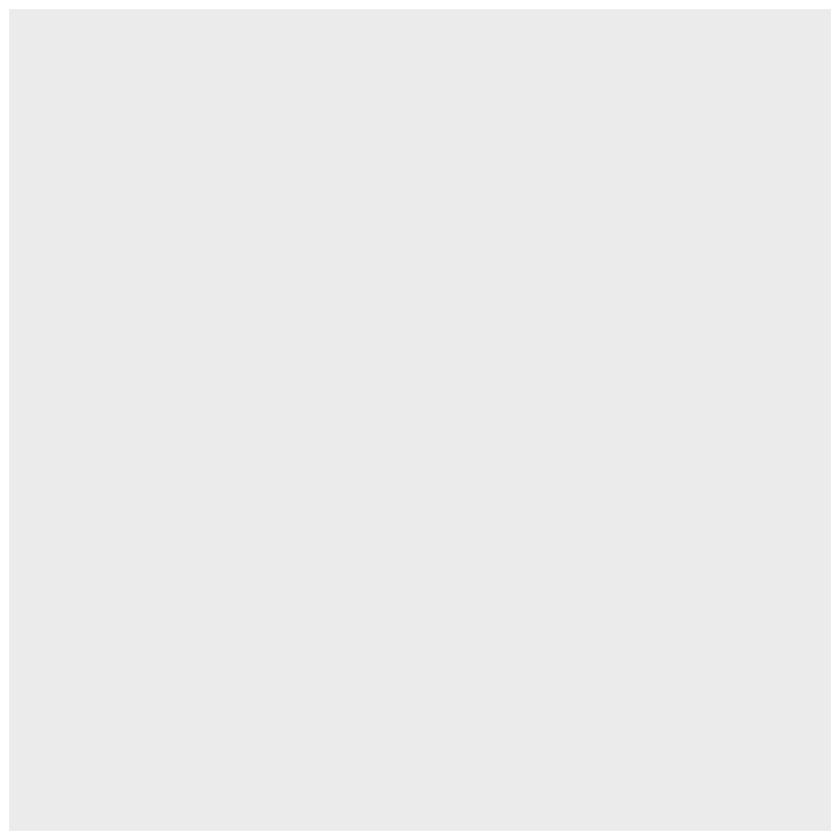

In [29]:
ggplot(data = trydb)

Now, we can add more components such as the aesthetics (`aes()`) and layers (functions starting with either `geom_` or `stat_`) and combine them with `+` signs:

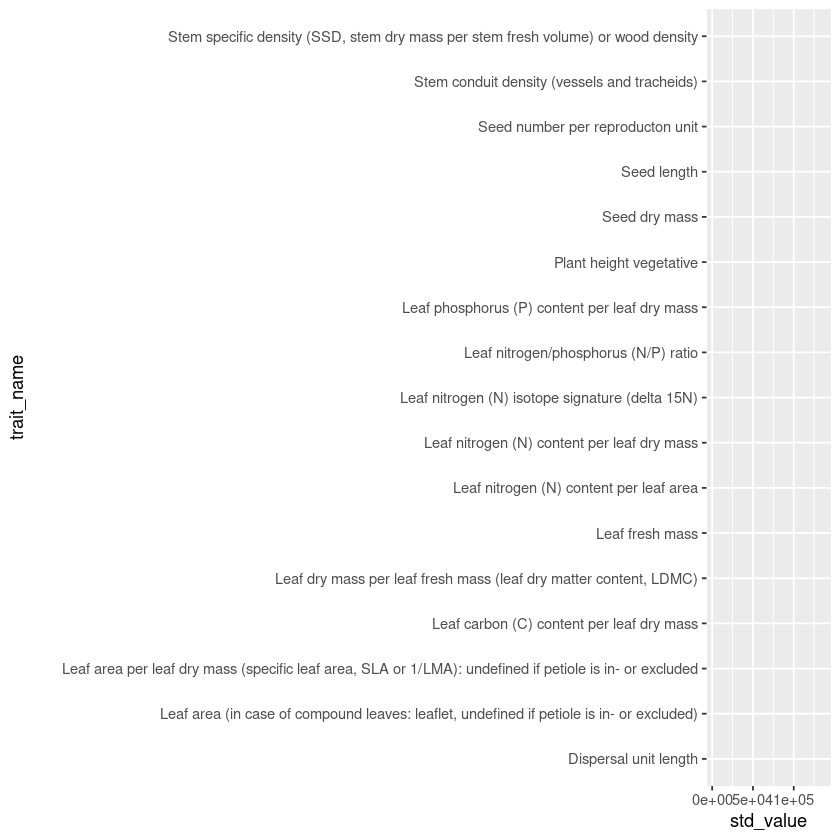

In [30]:
ggplot(data = trydb) +
  aes(x = std_value,
      y = trait_name)

Warning message:
“Removed 10 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


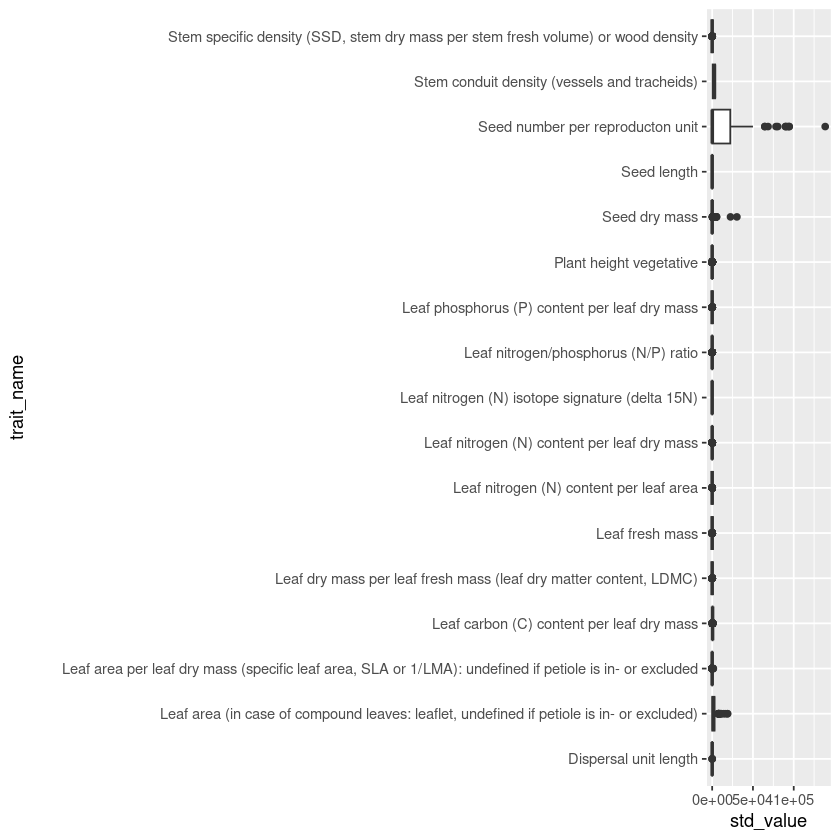

In [31]:
ggplot(data = trydb) +
  aes(x = std_value,
      y = trait_name) +
  geom_boxplot()

There are many different way how we can specify the data and aesthetics:

In [32]:
## aesthetics as an explicit component (with all aesthetics on a single line)
# ggplot(data = trydb) +
#   aes(x = std_value, y = trait_name) +
#   geom_boxplot()

## aesthetics as an explicit component (long format with aesthetics laid out line by line)
# ggplot(data = trydb) +
#   aes(
#     x = std_value, 
#     y = trait_name
#   ) +
#   geom_boxplot()

## aesthetics inside the ggplot() function
# ggplot(data = trydb,
#        mapping = aes(x = std_value, y = trait_name)) +
#   geom_boxplot()

## aesthetics inside the ggplot() function with implicit mathcing of arguments
# ggplot(trydb,
#        aes(std_value, trait_name)) +
#   geom_boxplot()

To make the trait names readable, we use the `str_trunc()` function from the `{stringr}` package to create shorer labels for the y categories. We can map the adjustment directly inside `aes()`, a behavior that is prefered over overwriting our original data:

Warning message:
“Removed 10 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


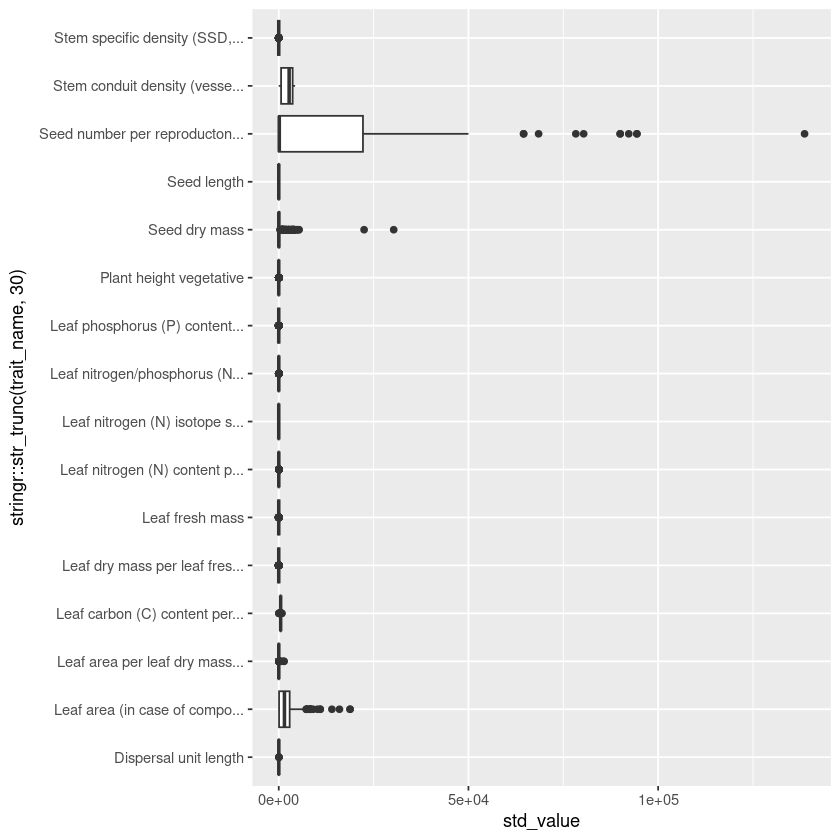

In [33]:
ggplot(trydb) +
  aes(
    x = std_value,
    y = stringr::str_trunc(trait_name, 30)
  ) +
  geom_boxplot()

The idea of the grammar of graphics is a standard way of encoding the input information (here `ggplot(data)` and `aes(columns)`) which allows us to change the layers without the need to adjust the rest of the code. Instead of summarizing the trait data, let's draw the **raw values as jittered point strips**:

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”


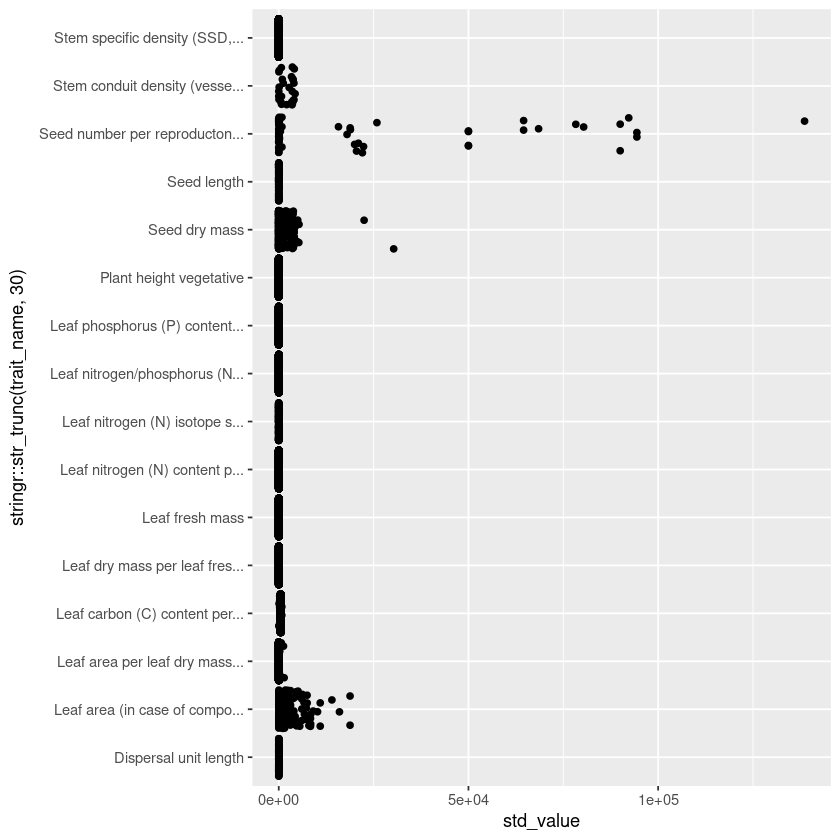

In [34]:
ggplot(trydb) +
  aes(
    x = std_value,
    y = stringr::str_trunc(trait_name, 30)
  ) +
  geom_jitter()

We can adjust the visual properties of the geometric layer. here, we change the point opacity (`alpha`) and the spread of the jitter (`height`, respective `width` when plotted vertically):

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”


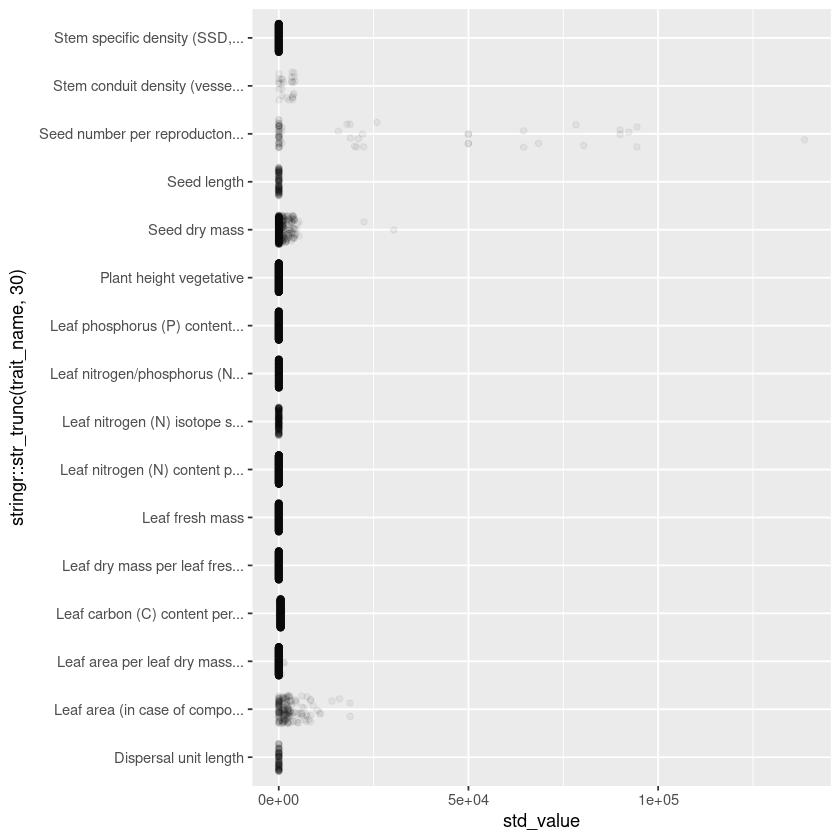

In [35]:
ggplot(trydb) +
  aes(
    x = std_value,
    y = stringr::str_trunc(trait_name, 30)
  ) +
  geom_jitter(
    height = .3,
    alpha = .05
  )

As the values are right-skewed with a few variables having rather high values, let's use a logarithmic x axis. We can modify the translation from our values to the aesthetic mapping by overwriting the default `scale_` component for the respective aesthetic (here`x`).

Warning message in transformation$transform(x):
“NaNs produced”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 157 rows containing missing values or values outside the scale range
(`geom_point()`).”


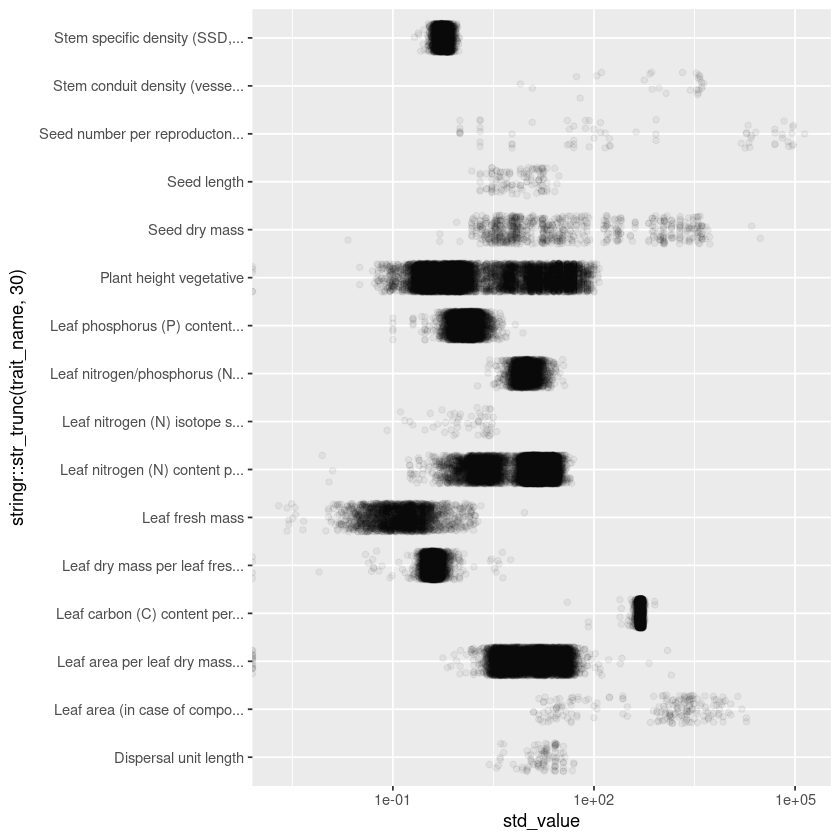

In [36]:
ggplot(trydb) +
  aes(
    x = std_value,
    y = stringr::str_trunc(trait_name, 30)
  ) +
  geom_jitter(
    height = .3,
    alpha = .05
  ) +
  scale_x_log10()

To avoid the removal of zero values when transforming the data, we can add 1 to the entries of the `std_value` column:

Warning message in transformation$transform(x):
“NaNs produced”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 141 rows containing missing values or values outside the scale range
(`geom_point()`).”


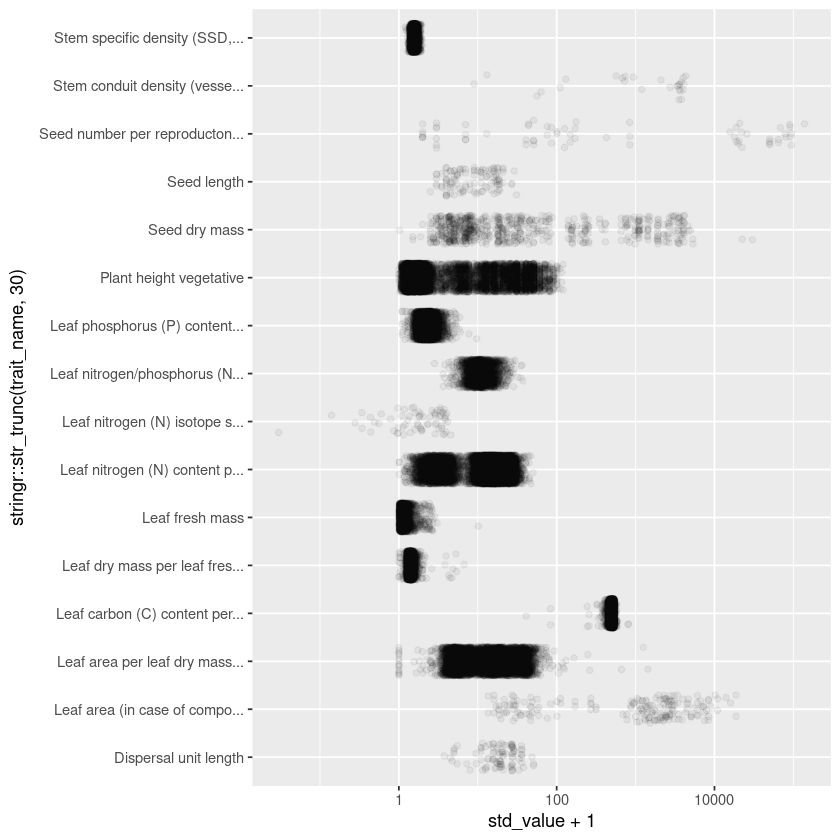

In [37]:
ggplot(data = trydb) +
  aes(
    x = std_value + 1,
    y = stringr::str_trunc(trait_name, 30)
  ) +
  geom_jitter(
    height = .3,
    alpha = .05
  ) +
  scale_x_log10()

Let's inspect the leaf nitrogen content data more closely. A common chart type to explore the underlying data is a **histogram**. A histogram only needs a single positional aesthetic (here `x`) as the other is the result of the values themselves, namely the *count of observations per bin*. We then create the chart by using `geom_histogram()`:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


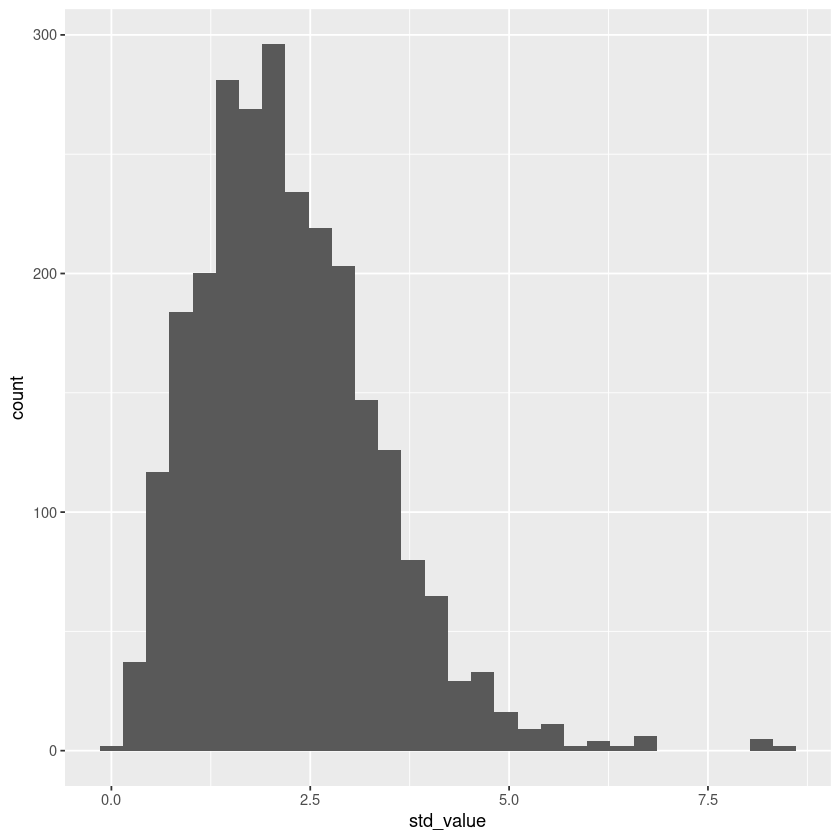

In [38]:
ggplot(trydb_nitro) +
  aes(x = std_value) +
  geom_histogram()

We can control the binning by either specifying the number of bins via the `bins` argument...

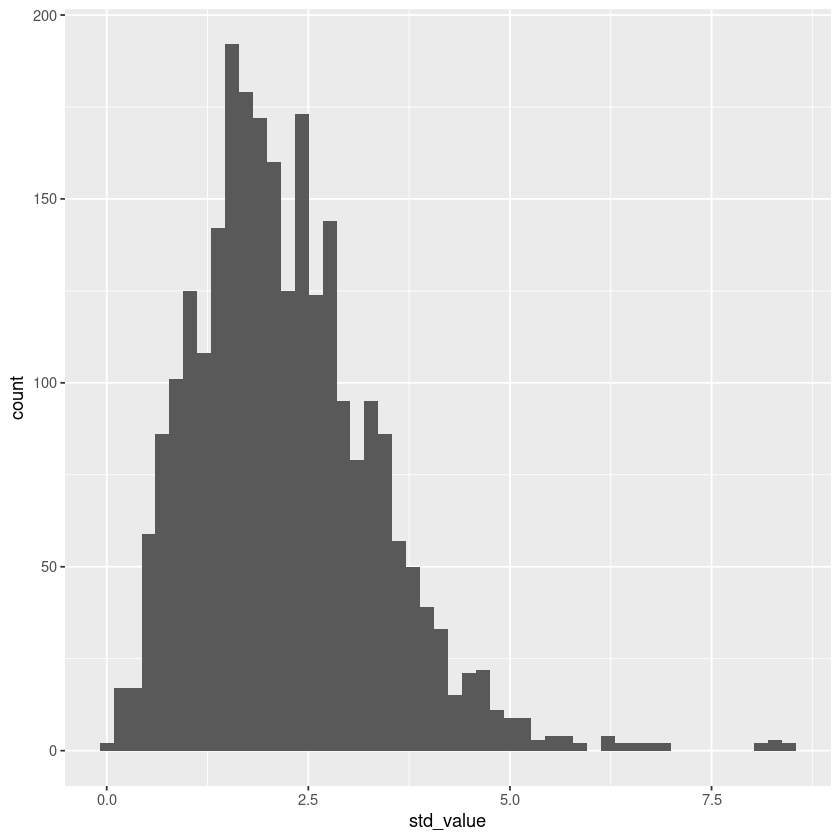

In [39]:
ggplot(trydb_nitro) +
  aes(x = std_value) +
  geom_histogram(
    bins = 50
  )

... or the width of the bins in units on the x axis via `binwidth`:

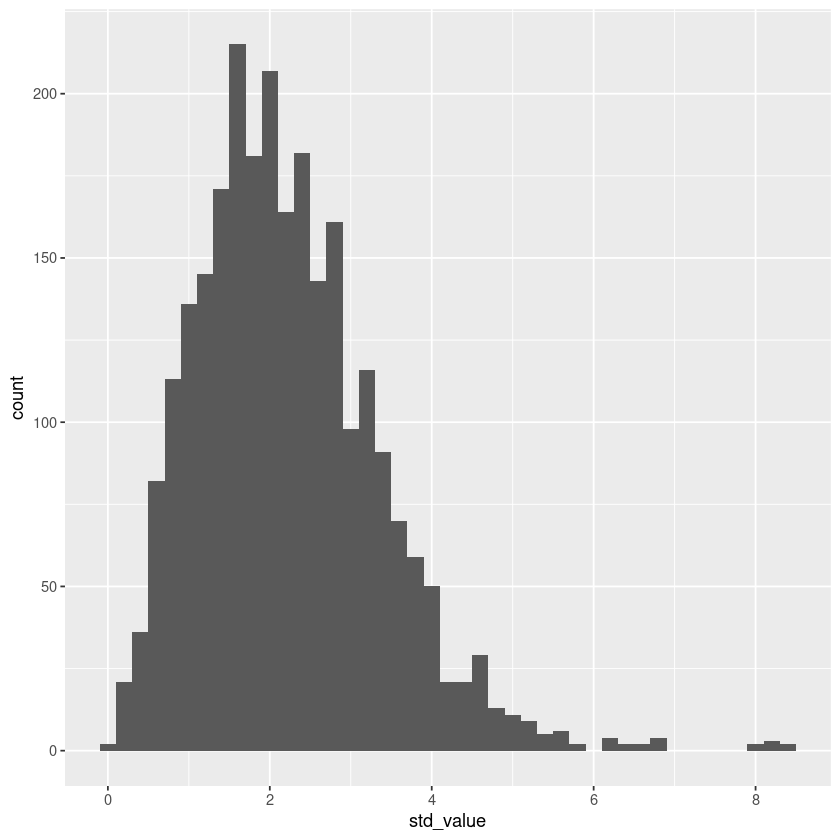

In [40]:
ggplot(trydb_nitro) +
  aes(x = std_value) +
  geom_histogram(
    binwidth = .2
  )

If we want to see the contribution of specific categories, we can pass the name of the categorical column of interest to the `fill` aesthetic:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


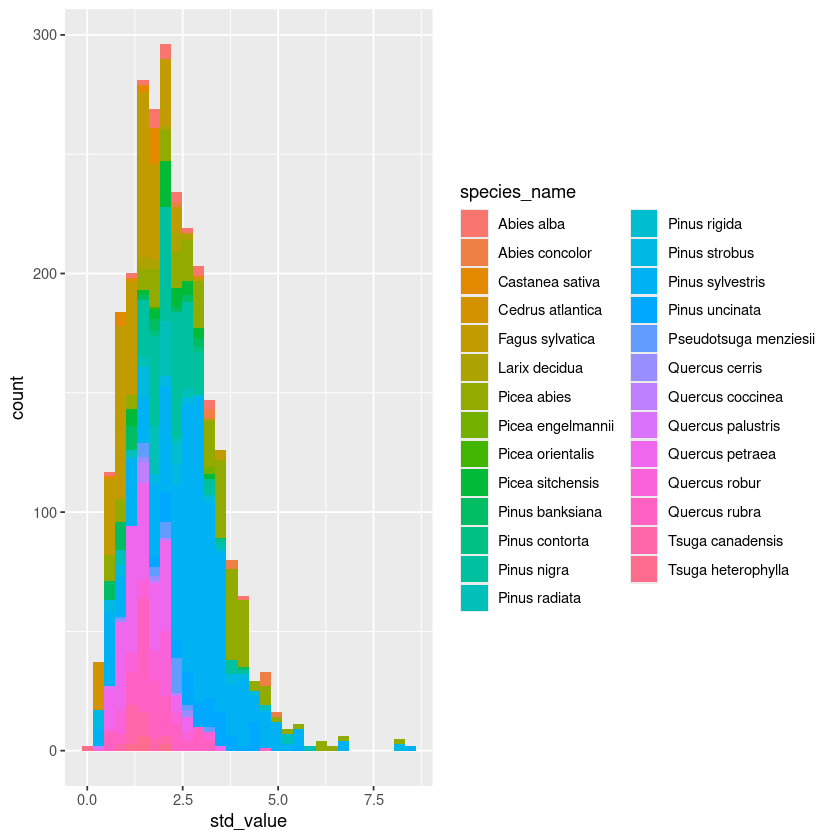

In [41]:
ggplot(trydb_nitro) +
  aes(x = std_value) +
  geom_histogram(
    aes(fill = species_name)
  )

... or use an expression to generate a TRUE/FALSE classification:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


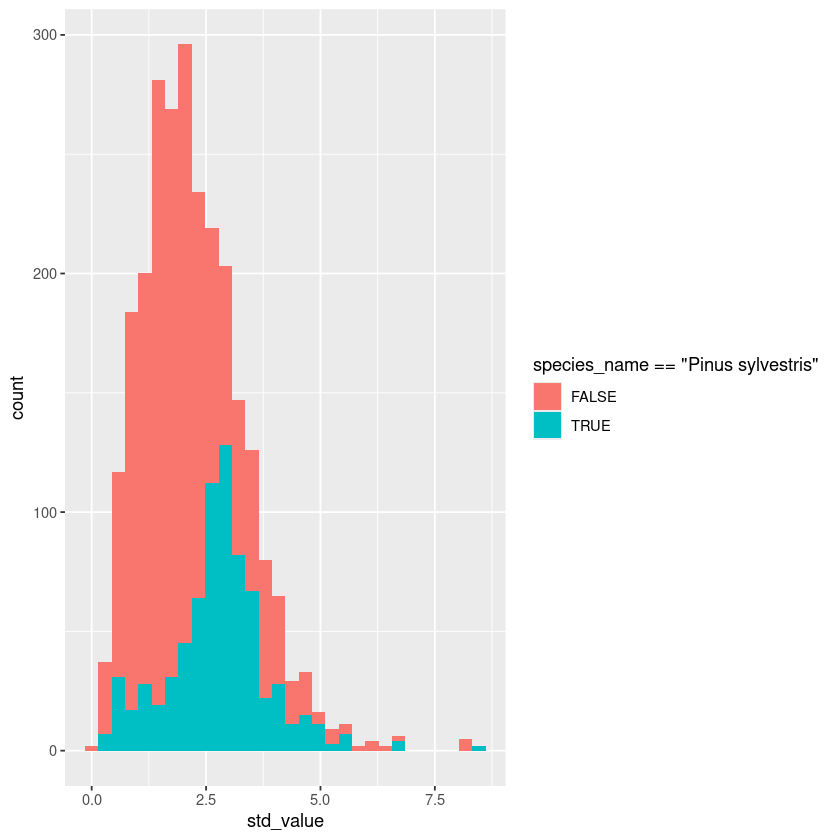

In [42]:
ggplot(trydb_nitro) +
  aes(x = std_value) +
  geom_histogram(
    aes(fill = species_name == "Pinus sylvestris")
  )

As there are way too many species to encode by color (or more precisely `fill`), let's show the genera:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


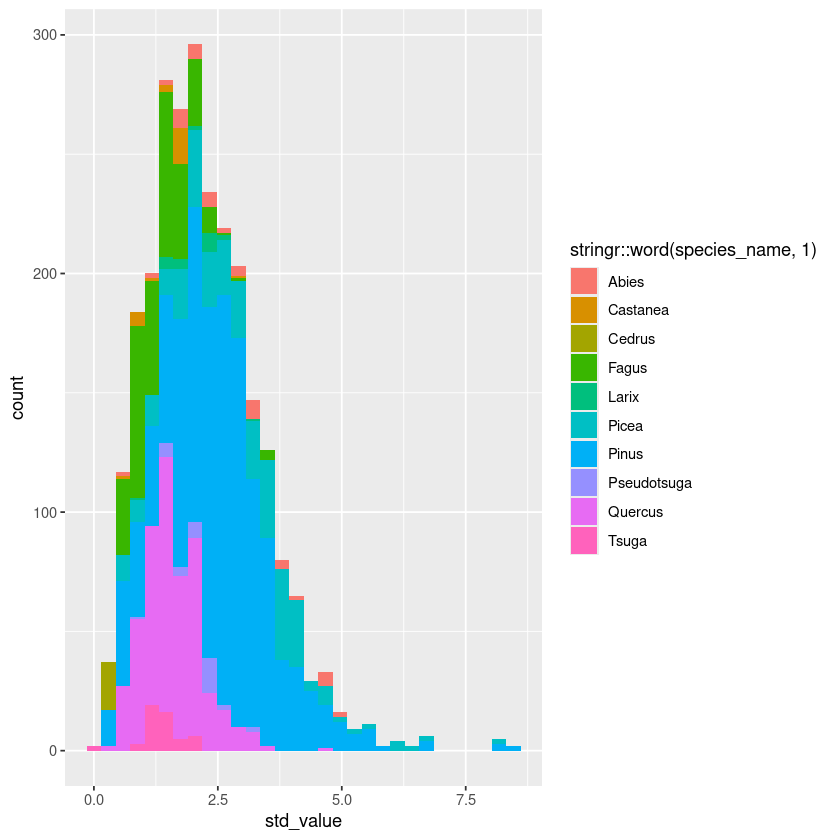

In [43]:
ggplot(trydb_nitro) +
  aes(x = std_value) +
  geom_histogram(
    aes(fill = stringr::word(species_name, 1))
  )

To improve the readability a bit, we change the color palette via a `scale_fill_*()` function. Let's use a pre-defined color palette from another R package called `{rcartocolor}`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


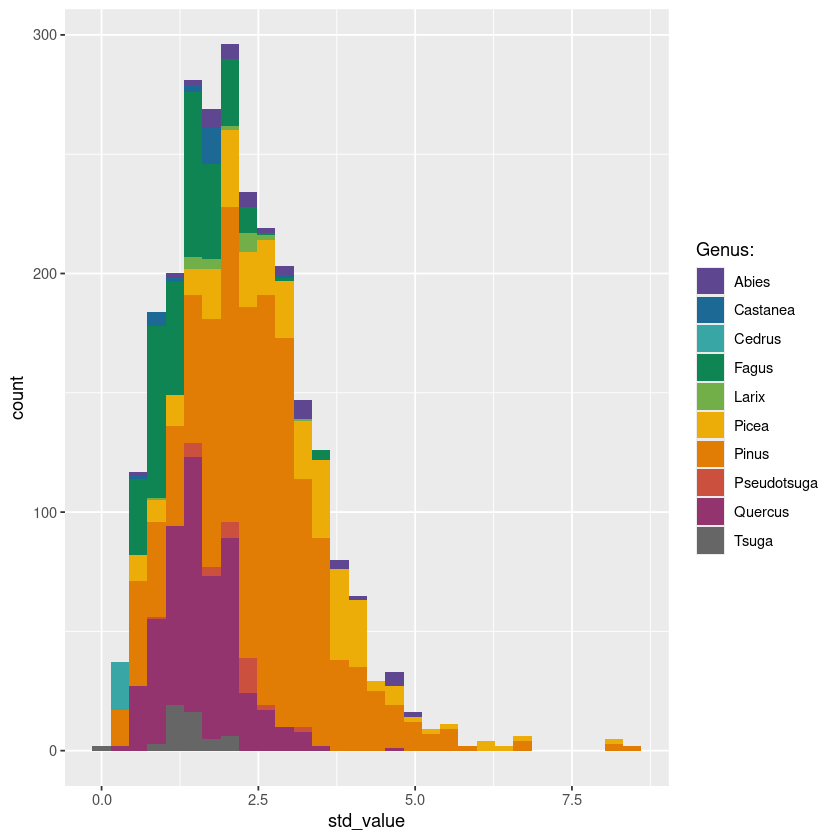

In [44]:
ggplot(trydb_nitro) +
  aes(x = std_value) +
  geom_histogram(
    aes(fill = stringr::word(species_name, 1))
  ) +
  rcartocolor::scale_fill_carto_d(
    palette = "Prism",
    name = "Genus:"
  )

As stacked histograms are hard to read anyway, let's take a different approach: **small multiples**. The idea is to split the original data into subsets and to create one plot per group. 

Small multiples are called **facets** in `{ggplot2}`. There are two functions to create them, `facet_wrap()` and `facet_grid()`. The categories to use for subsetting are passed either to the left and/or right of a circumflex.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


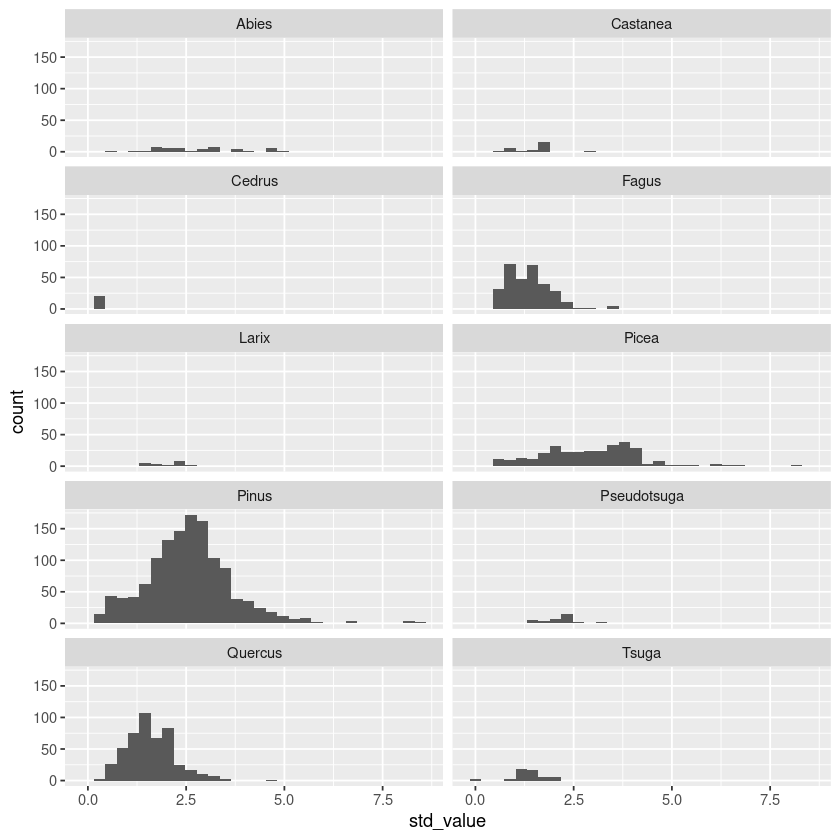

In [45]:
ggplot(trydb_nitro) +
  aes(x = std_value) +
  geom_histogram() +
  facet_wrap(
    ~ stringr::word(species_name, 1),
    ncol = 2
  )

Note that `{ggplot2}` ensures consistent axes ranges by default. This is recommended as varying step lengths along the axes have an increased potential to be misleading and harder to interpret. If you want to have free-ranging axes, set the `scales` argument of the `facet` function to `"free"`, `"free_x"`, or `"free_y"`.

Switching back to the exploration of the species-level data, we could represent the main summary statistics of the distribution per species as **box-and-whiskers plot**:

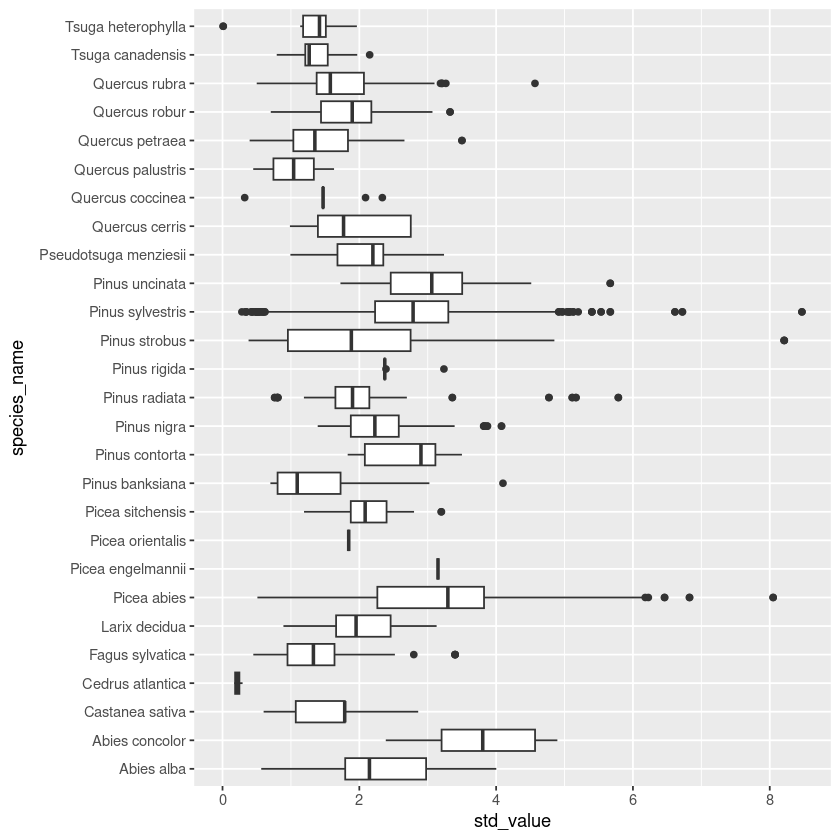

In [46]:
ggplot(trydb_nitro) +
  aes(
    x = std_value,
    y = species_name
  ) +
  geom_boxplot()

Or we could represent the data collapsed into **errorbars**. For this task, we use a new family of layer functions, a statistical layer starting with `stat_`. The default of the `stat_summary()` function creates a "pointrange" with the point being the average and the start and end points of the line showing **mean ± standard error**:

No summary function supplied, defaulting to `mean_se()`
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


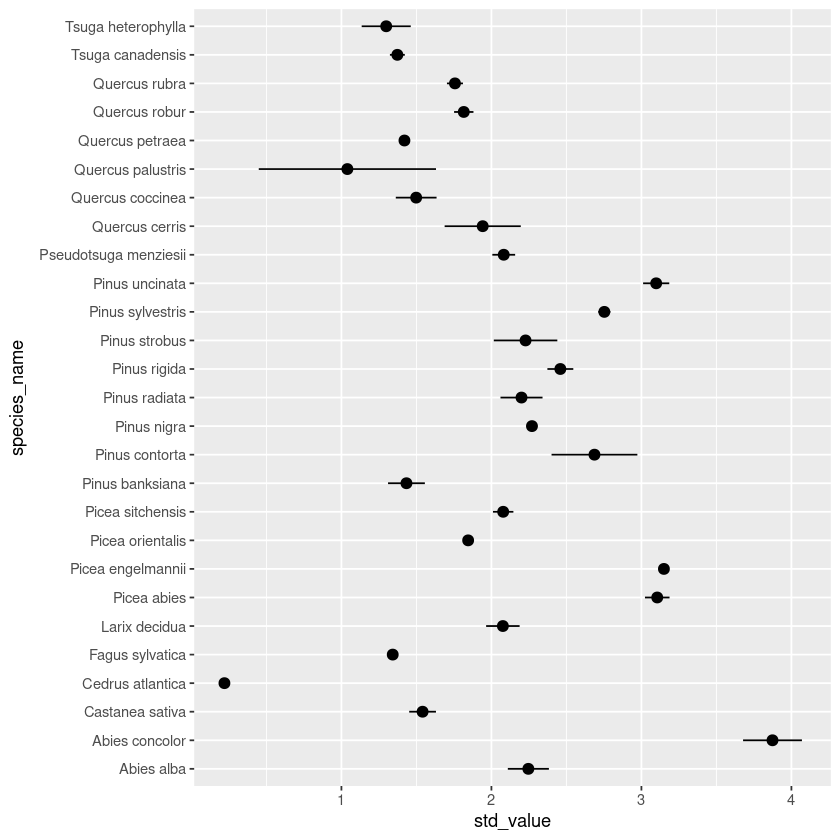

In [47]:
ggplot(trydb_nitro) +
  aes(
    x = std_value,
    y = species_name
  ) +
  stat_summary()

To adjust the statisitical summary, we can pass either a pre-defined method that returns three data values to the `fun.data` argument, e.g. `stat_summary(fun.data = "mean_se")` (the default) or `stat_summary(fun.data = "mean_cl_boot")`), or three individual functions for `xmin`, `x`, and `xmax` (or `ymin`, `y`, and `ymax` when plotted vertically) via `fun.min`, `fun`, and `fun.max`. 

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


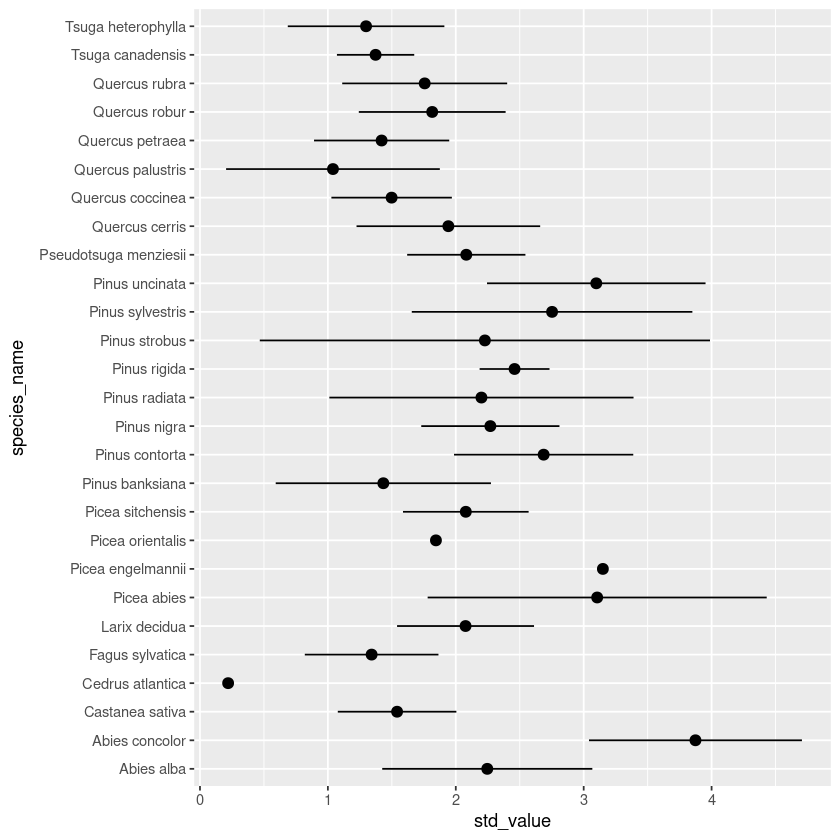

In [48]:
ggplot(trydb_nitro) +
  aes(
    x = std_value,
    y = species_name
  ) +
  stat_summary(
    fun = "mean",
    fun.min = function(x) mean(x, na.rm = TRUE) - sd(x, na.rm = TRUE),
    fun.max = function(x) mean(x, na.rm = TRUE) + sd(x, na.rm = TRUE)
  )

#### Polish the Data Visualization 

Now let's add some meaningful labels and titles. Axis titles can be changed via the `labs()` or the respective `scale` function. To modify the axis expansion, limits, breaks, and labels, we use the `scale` function as well. We also apply an alternative complete theme that is shipped with `{ggplot2}` and modify it slightly by removing te mimor and horizontal grid lines and adjusting the species labels as italicized, left-aligned text.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


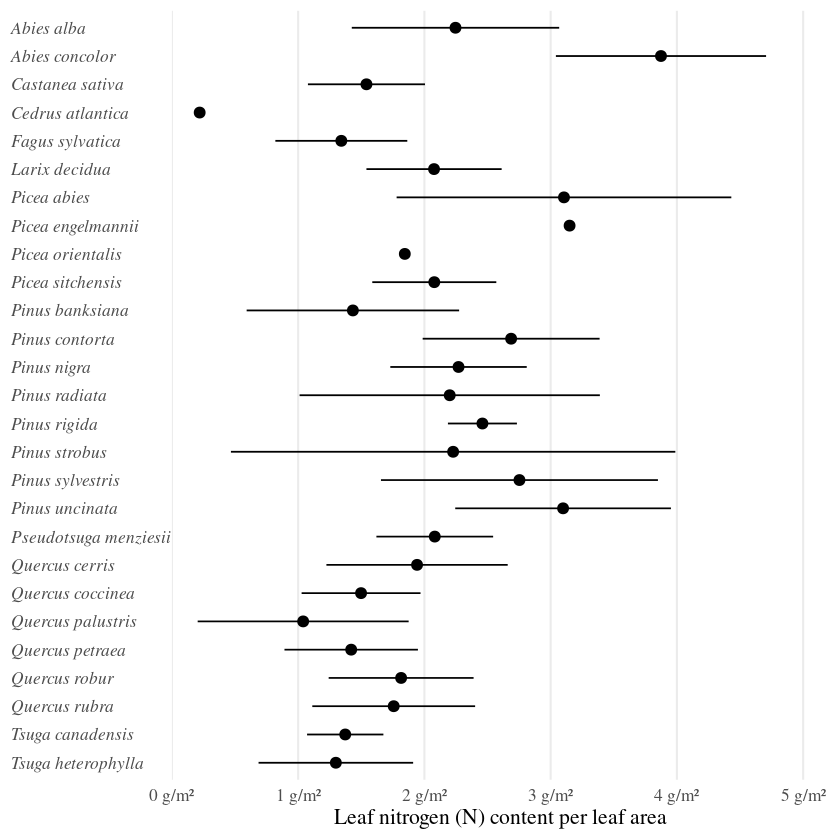

In [49]:
ggplot(trydb_nitro) +
  aes(
    x = std_value,
    y = species_name
  ) +
  stat_summary(
    fun = "mean",
    fun.min = function(x) mean(x, na.rm = TRUE) - sd(x, na.rm = TRUE),
    fun.max = function(x) mean(x, na.rm = TRUE) + sd(x, na.rm = TRUE)
  ) +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    limits = c(0, NA),
    labels = scales::number_format(suffix = " g/m²")
  ) +
  scale_y_discrete(limits = rev) +
  labs(
    x = "Leaf nitrogen (N) content per leaf area",
    y = NULL
  ) +
  theme_minimal(
    base_family = "Times",
    base_size = 13
  ) +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.text.y = element_text(face = "italic", hjust = 0)
  )

In case you want to order the species in a different way, the **`{forcats}`** package provides perfect utility functions. In the following visualization, the species are ordered by their average thanks to the `fct_reorder()` function that takes a category (factor) to as well as a variable and the statistical summary to sort by as inputs.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


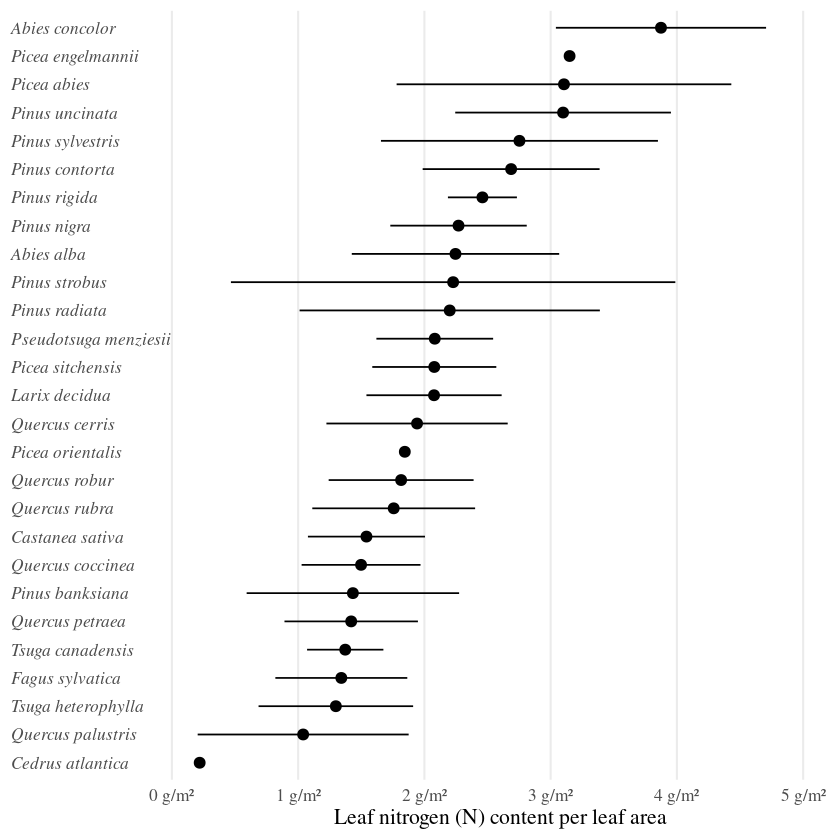

In [50]:
ggplot(trydb_nitro) +
  aes(
    x = std_value,
    y = forcats::fct_reorder(species_name, std_value, .fun = "mean")
  ) +
  stat_summary(
    fun = "mean",
    fun.min = function(x) mean(x, na.rm = TRUE) - sd(x, na.rm = TRUE),
    fun.max = function(x) mean(x, na.rm = TRUE) + sd(x, na.rm = TRUE)
  ) +
  coord_cartesian(clip = "off") +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    limits = c(0, NA),
    labels = scales::number_format(suffix = " g/m²")
  ) +
  labs(
    x = "Leaf nitrogen (N) content per leaf area",
    y = NULL
  ) +
  theme_minimal(
    base_family = "Times",
    base_size = 13
  ) +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.text.y = element_text(face = "italic", hjust = 0)
  )

To show the underlying sample size and distribution, we add jitter strips **below** the error bars:

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


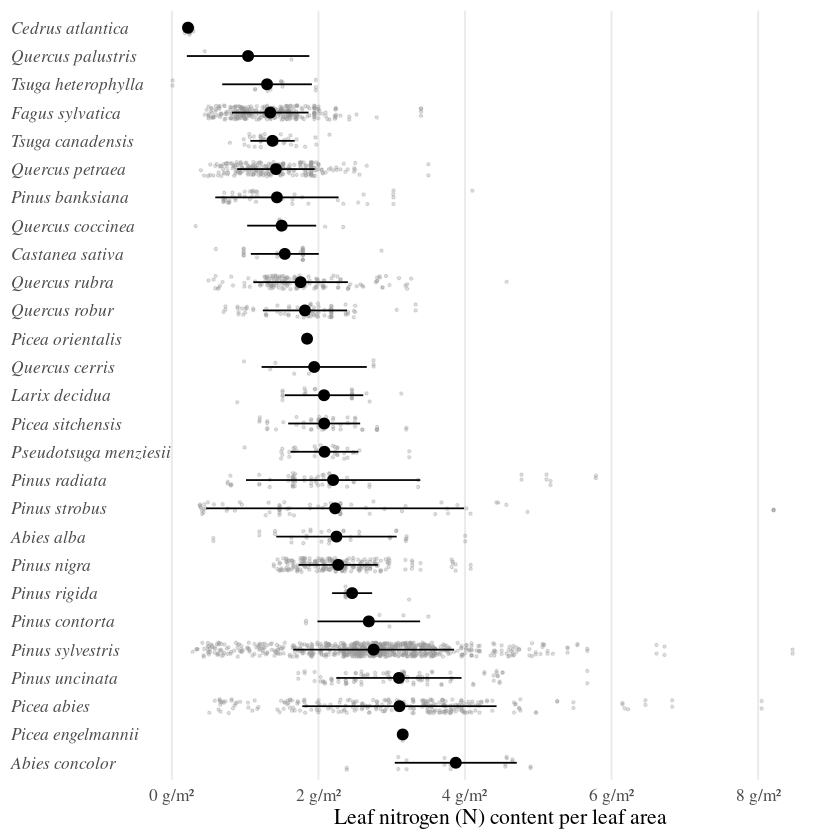

In [51]:
ggplot(trydb_nitro) +
  aes(
    x = std_value,
    y = forcats::fct_reorder(species_name, std_value, .fun = "mean")
  ) +
  geom_jitter(
    height = .25,
    alpha = .3,
    size = .6,
    color = "grey60"
  ) +
  stat_summary(
    fun = "mean",
    fun.min = function(x) mean(x, na.rm = TRUE) - sd(x, na.rm = TRUE),
    fun.max = function(x) mean(x, na.rm = TRUE) + sd(x, na.rm = TRUE)
  ) +
  coord_cartesian(clip = "off") +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    limits = c(0, NA),
    labels = scales::number_format(suffix = " g/m²")
  ) +
  scale_y_discrete(limits = rev) +
  labs(
    x = "Leaf nitrogen (N) content per leaf area",
    y = NULL
  ) +
  theme_minimal(
    base_family = "Times",
    base_size = 13
  ) +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.text.y = element_text(face = "italic", hjust = 0)
  )

Or, we could also show genus-level data. Here, we pass the adjusted data set that contains the gnus information into the `ggplot()` call by using the pipe

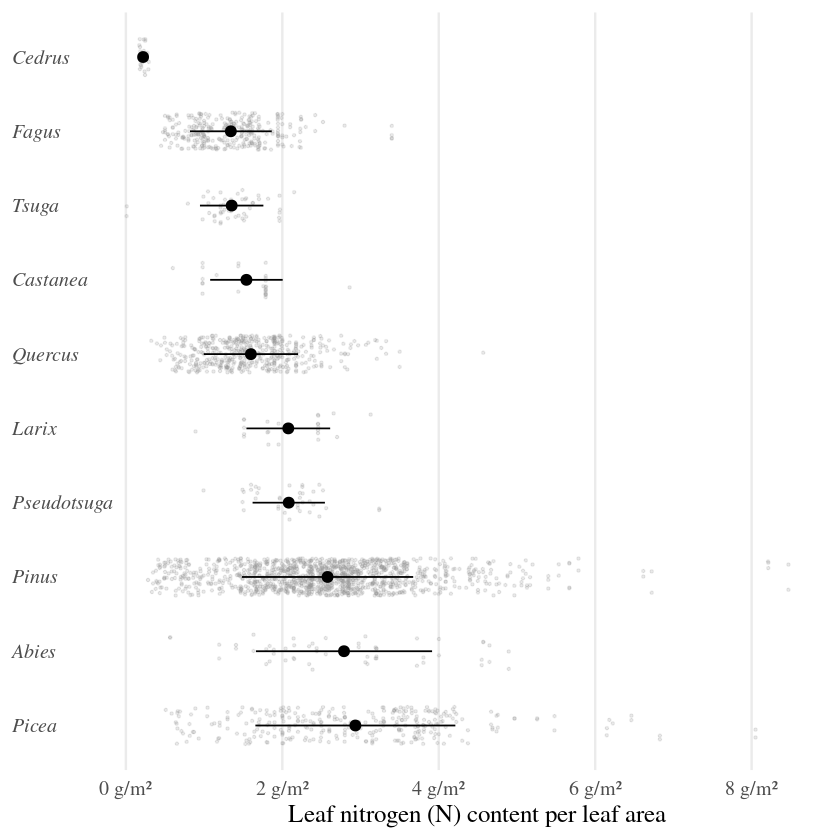

In [52]:
trydb_nitro |> 
  mutate(genus_name = stringr::word(species_name, 1)) |> 
  ggplot() +
  aes(
    x = std_value,
    y = forcats::fct_reorder(genus_name, std_value, .fun = "mean")
  ) +
  geom_jitter(
    height = .25,
    alpha = .2,
    size = .6,
    color = "grey60"
  ) +
  stat_summary(
    fun = "mean",
    fun.min = function(x) mean(x, na.rm = TRUE) - sd(x, na.rm = TRUE),
    fun.max = function(x) mean(x, na.rm = TRUE) + sd(x, na.rm = TRUE)
  ) +
  coord_cartesian(clip = "off") +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    limits = c(0, NA),
    labels = scales::number_format(suffix = " g/m²")
  ) +
  scale_y_discrete(limits = rev) +
  labs(
    x = "Leaf nitrogen (N) content per leaf area",
    y = NULL
  ) +
  theme_minimal(
    base_family = "Times",
    base_size = 15
  ) +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.text.y = element_text(face = "italic", hjust = 0)
  )

If you prefer a box plot, we can switch our custom `stat_summary()` for `geom_boxplot()`. Make sure to place it **below** the jitter strips, otherwise points behind the box are not visible. I also recommend to remove the outliers as they are shown as jittered points anyway and the adidtional points may suggest more raw data values as there are in reality.

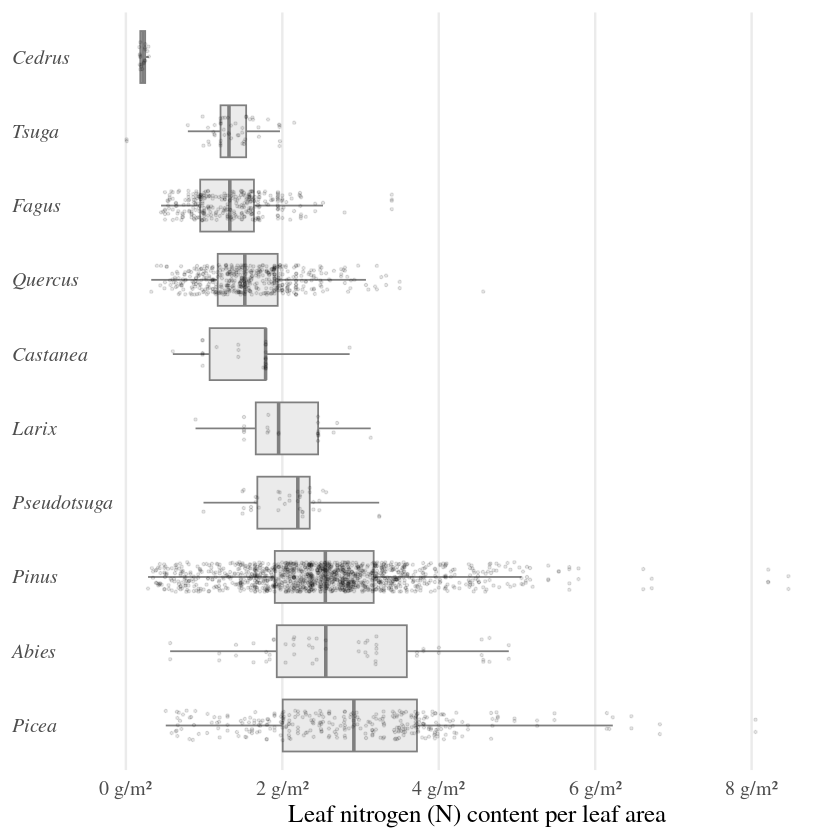

In [53]:
trydb_nitro |> 
  mutate(genus_name = stringr::word(species_name, 1)) |> 
  ggplot() +
  aes(
    x = std_value,
    y = forcats::fct_reorder(genus_name, std_value, .fun = "median")
  ) +
  geom_boxplot(
    color = "grey50",
    fill = "grey92",
    outlier.colour = NA,
    width = .7
  ) +
  geom_jitter(
    height = .2,
    alpha = .1,
    size = .6
  ) +
  coord_cartesian(clip = "off") +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    limits = c(0, NA),
    labels = scales::number_format(suffix = " g/m²")
  ) +
  scale_y_discrete(limits = rev) +
  labs(
    x = "Leaf nitrogen (N) content per leaf area",
    y = NULL
  ) +
  theme_minimal(
    base_family = "Times",
    base_size = 15
  ) +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.text.y = element_text(face = "italic", hjust = 0)
  )

### For another example, let's visualize the GBIF data

As a first step we are interested in the overall number of reported trees per species in Germany. We can use a bar chart for that with `species` as the categorical variable and the estimated `count` representing the length of the bar.

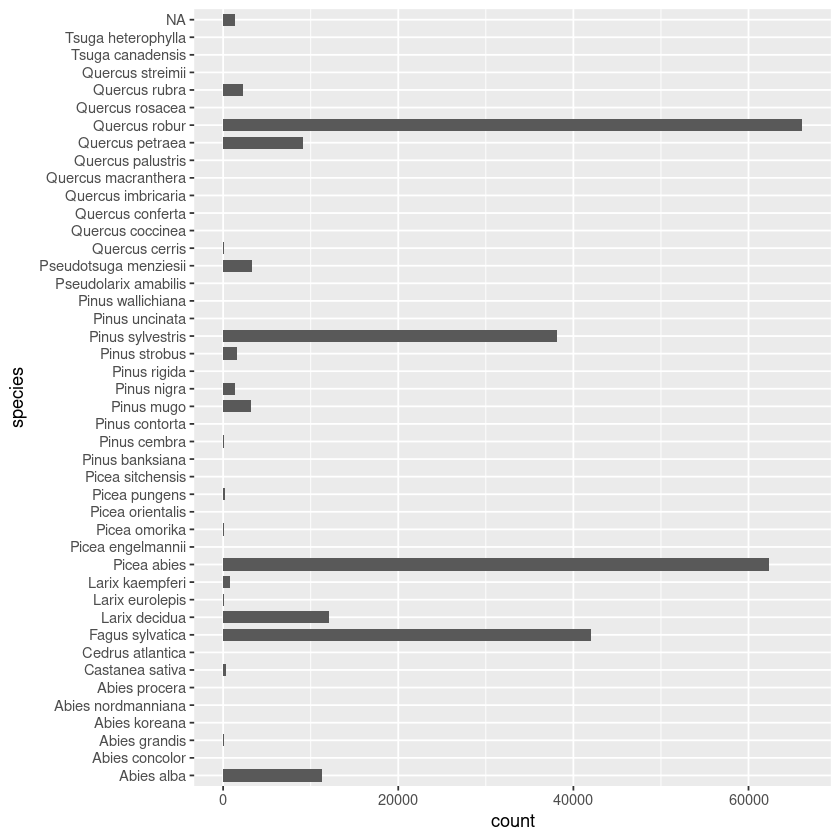

In [54]:
ggplot(gbif) +
  aes(y = species) +
  geom_bar(width = .7)

Note that `{ggplot2}` includes the zero baseline (and it's rather difficult to create a bar chart that violates this principle).

Let's focus on the most common species, say with more than ten thousand observations:

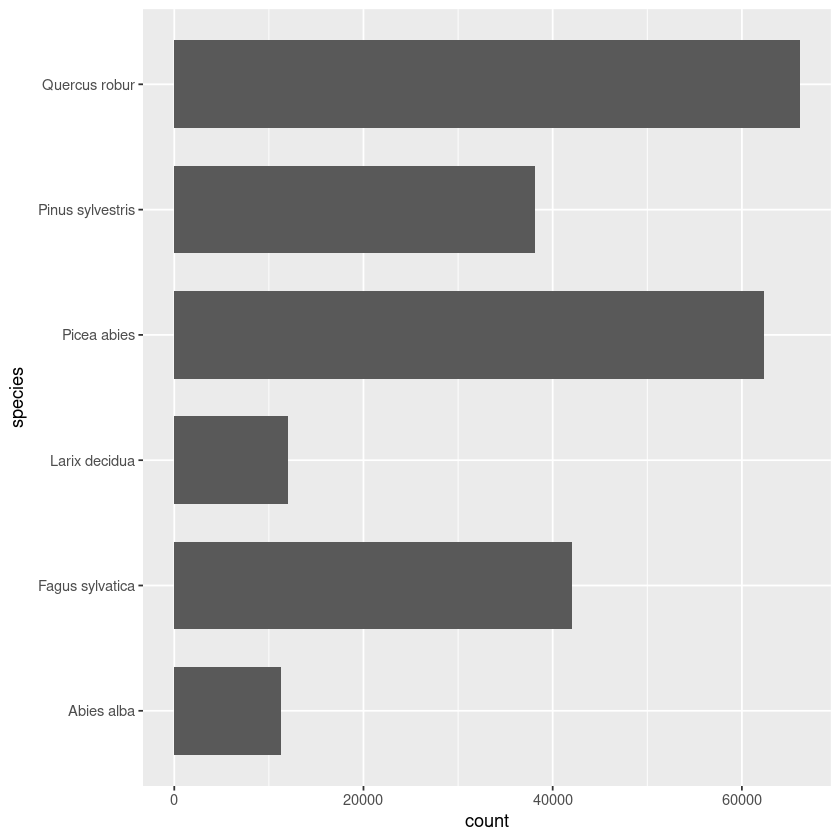

In [55]:
gbif |> 
  group_by(species) |> 
  filter(n() > 10000) |> 
  ggplot() +
  aes(y = species) +
  geom_bar(width = .7)

Great! For the next steps, we store the filtered data set as `gbif_common`.

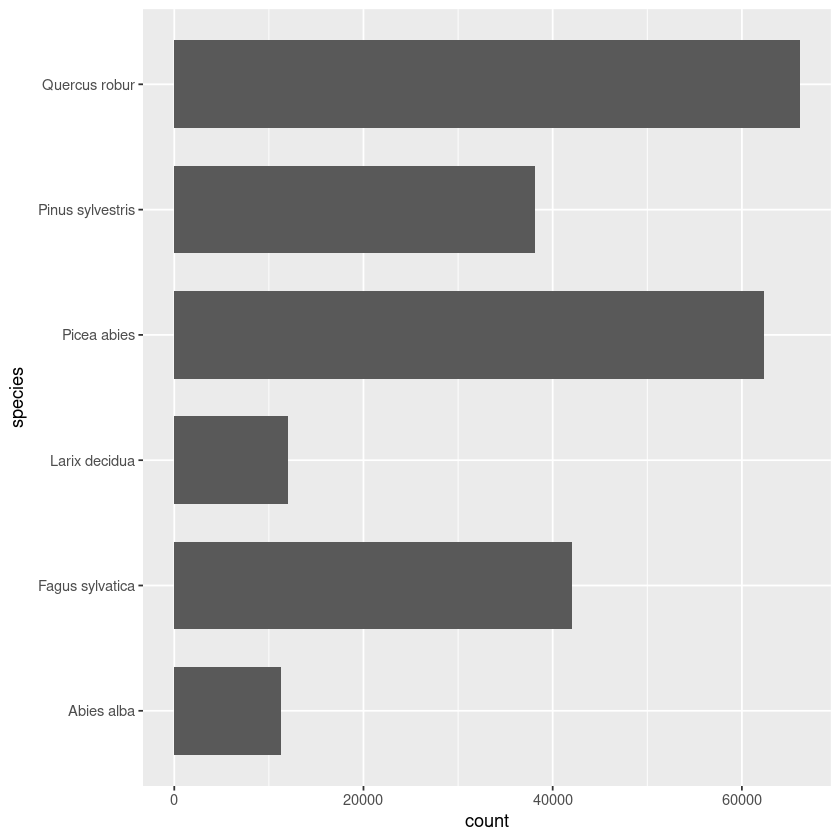

In [56]:
gbif_common <-
  gbif |> 
  group_by(species) |> 
  filter(n() > 10000) |> 
  ungroup()
  

ggplot(gbif_common) +
  aes(y = species) +
  geom_bar(width = .7)

The `fct_infreq()` function allows us to sort the bars by frequency. The order is ascending by default, but we can reverse it with `scale_y_discrete()`; or we could wrap the `fct_infreq()` inside the `fct_rev()` function.

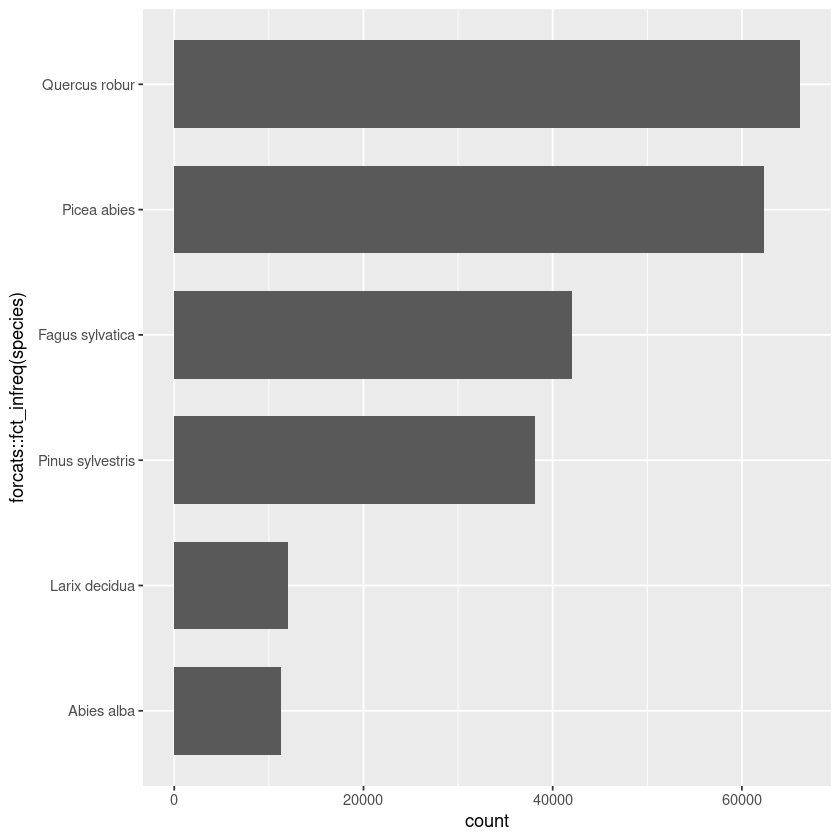

In [57]:
ggplot(gbif_common) +
  aes(y = forcats::fct_infreq(species)) +
  geom_bar(width = .7) +
  scale_y_discrete(limits = rev)

By passing an expression, we can highlight a specific bar (or set of bars). To overwrite the default categorical colors, we use `scale_fill_manual()` in combination with two custom colors. By passing `guide = "none"` we remove the legend. Also, we add labels and use a different theme with a custom font. Finally, to avoid repeated code, we store our intermediate ggplot and extend it later.

In [58]:
g <- 
  ggplot(gbif_common) +
  aes(y = forcats::fct_infreq(species)) +
  geom_bar(
    aes(fill = species == "Quercus robur"),
    width = .7
  ) +
  scale_y_discrete(limits = rev) +
  scale_fill_manual(
    values = c("grey40", "#28A87D"), guide = "none"
  ) +
  labs(
    x = "Number of observations in Germany",
    y = NULL,
    caption = "Data: Global Biodiversity Information Facility (GBIF)"
  )  +
  theme_minimal(
    base_family = "Times",
    base_size = 16
  )

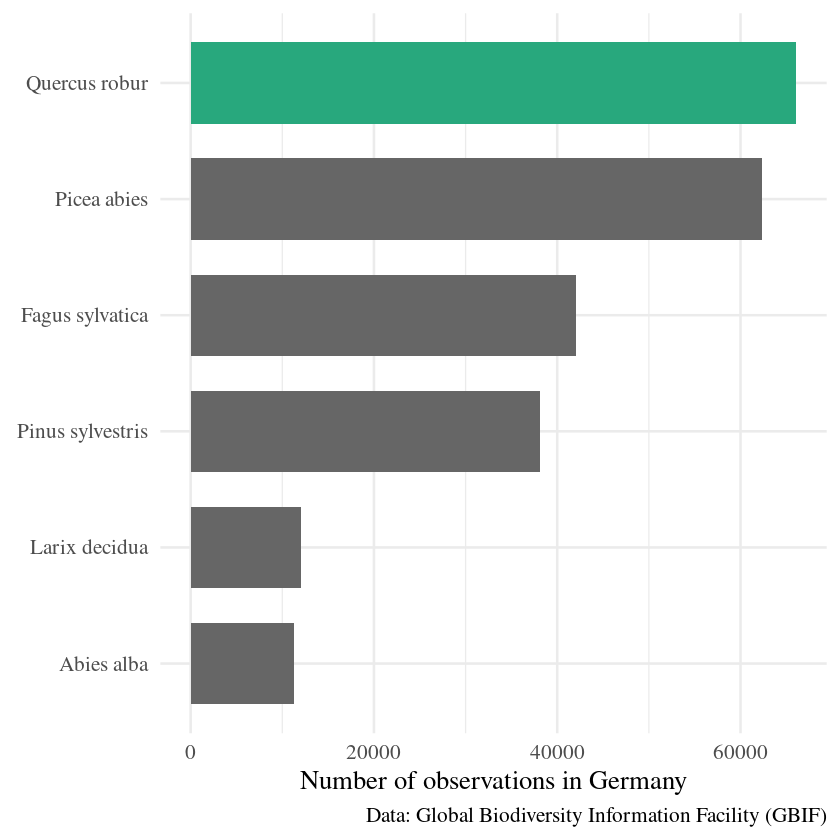

In [59]:
g

In a next step, we adjust the x axis (no padding on the left of the bars and a comam as big mark) and modify the theme. The `clip = "off"` ensures that the zero gridline is not clipped by the panel and shows in full width (i.e. the same width as all other grid lines).

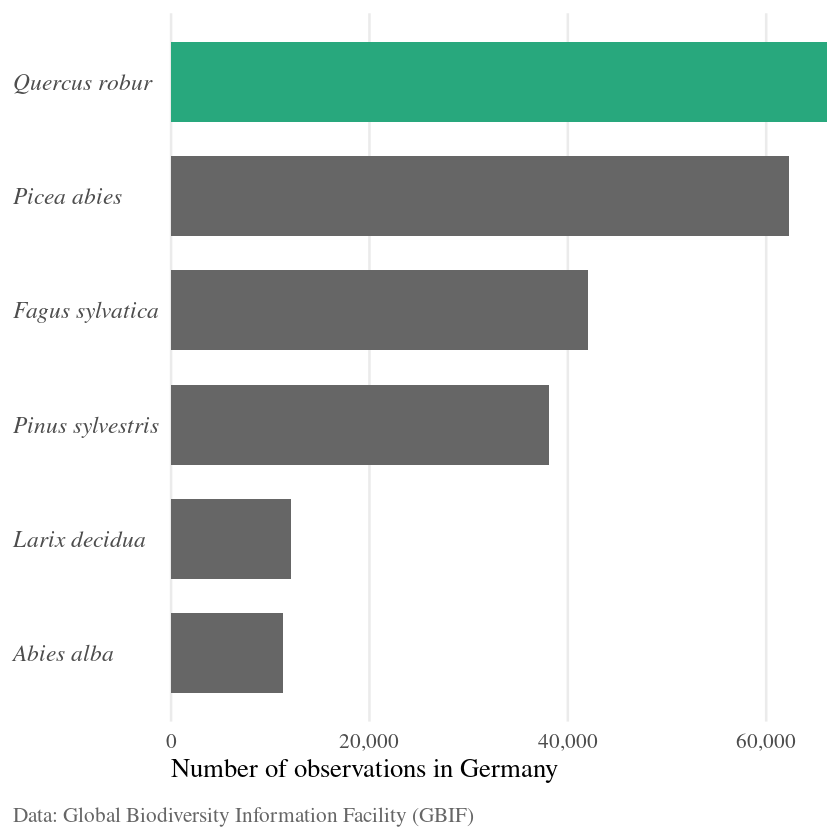

In [60]:
g +
  coord_cartesian(clip = "off") +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    labels = scales::comma
  ) +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major.y = element_blank(),
    axis.title.x = element_text(hjust = 0),
    axis.text.y = element_text(face = "italic", hjust = 0, size = rel(1.1)),
    plot.caption = element_text(color = "grey40", hjust = 0, margin = margin(t = 15)),
    plot.caption.position = "plot"
  )

Instead of using axis labels and a grid, we could also plot the numbers as direct annotations. For this, we use the `stat_count()` function in combination with the `text` geometry. To print the estimated count, we need to pass the `count` inside a function called `after_stat()`. That makes sure to print the number *after the statistics have been applied*, and not the raw values. As the labels are data-related, we need to pass it inside the `aes()` function to the `label` aesthetic. We also add a title and style it.

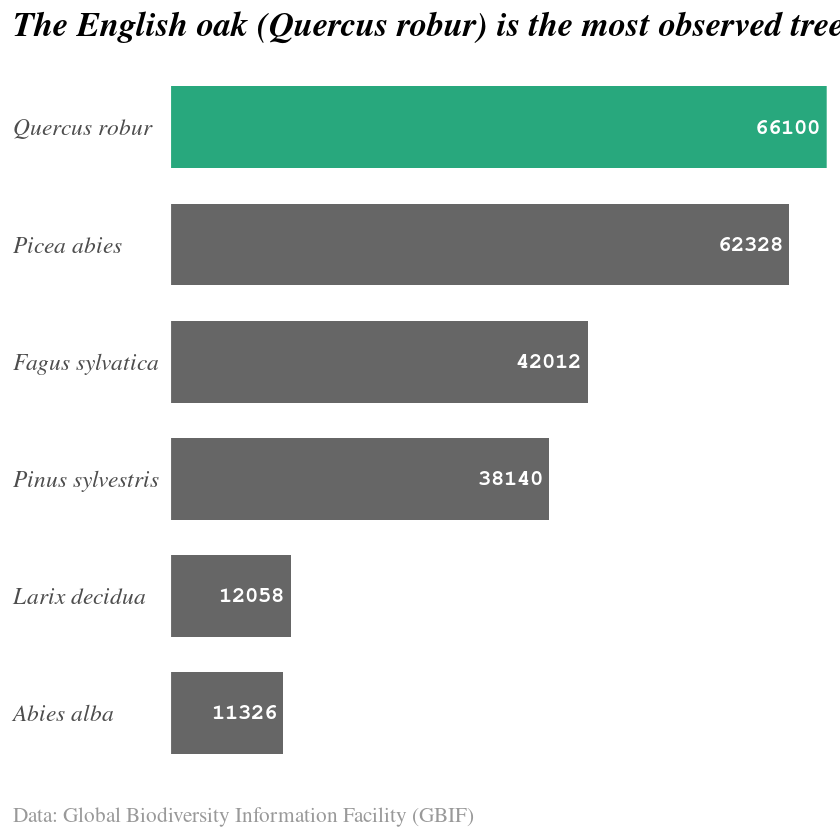

In [61]:
g +
  stat_count(
    geom = "text",
    aes(label = after_stat(count)),
    hjust = 1.1,
    family = "Courier",
    color = "white",
    fontface = "bold",
    size = 4.7
  ) +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    limits = c(0, NA),
    guide = "none",
    name = NULL
  ) +
  labs(title = "The English oak (Quercus robur) is the most observed tree species in Germany") +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text.y = element_text(face = "italic", hjust = 0, size = rel(1.1)),
    plot.caption = element_text(color = "grey60", hjust = 0, margin = margin(t = 15)),
    plot.caption.position = "plot",
    plot.title = element_text(face = "bold.italic", size = rel(1.3)),
    plot.title.position = "plot"
  )

Okay, now a bit more of text styling and we are done! We can use our American number style by passing the count to the format function. To avoid the overflowing title, we can either add a linebreak manually (by adding a `\n`) or use the textbox elements from the **`{ggtext}`** package that wrap long text labels automatically.

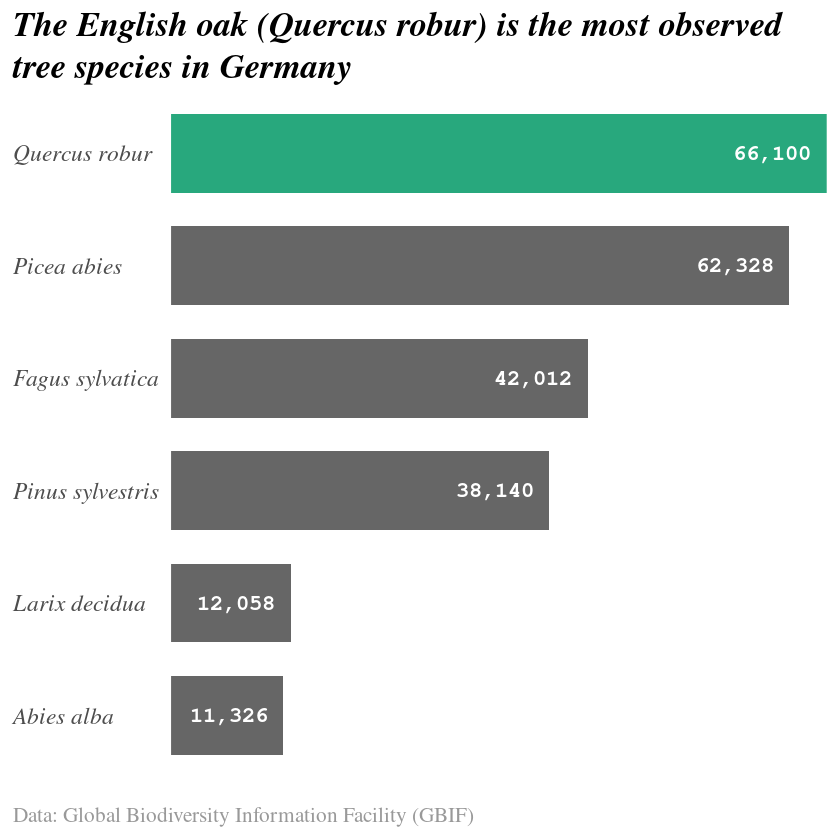

In [62]:
g +
  stat_count(
    geom = "text",
    aes(label = after_stat(format(count, big.mark = ","))),
    hjust = 1.2,
    family = "Courier",
    color = "white",
    fontface = "bold",
    size = 4.7
  ) +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    limits = c(0, NA),
    guide = "none",
    name = NULL
  ) +
  labs(title = "The English oak (Quercus robur) is the most observed tree species in Germany") +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text.y = element_text(face = "italic", hjust = 0, size = rel(1.1)),
    plot.caption = element_text(color = "grey60", hjust = 0, margin = margin(t = 15)),
    plot.caption.position = "plot",
    plot.title = ggtext::element_textbox_simple(face = "bold.italic", size = rel(1.3)),
    plot.title.position = "plot"
  )

The elements (and geometrical layers) from `{ggtext}` also allow for basic text rendering. To style specific words, we can use Markdown syntax (i.e. words wrapped into one asterisk or underscore become italic, two turn it bold, and three make it bold and italic). This is great for biologists to italicize species and genus names! 🙌

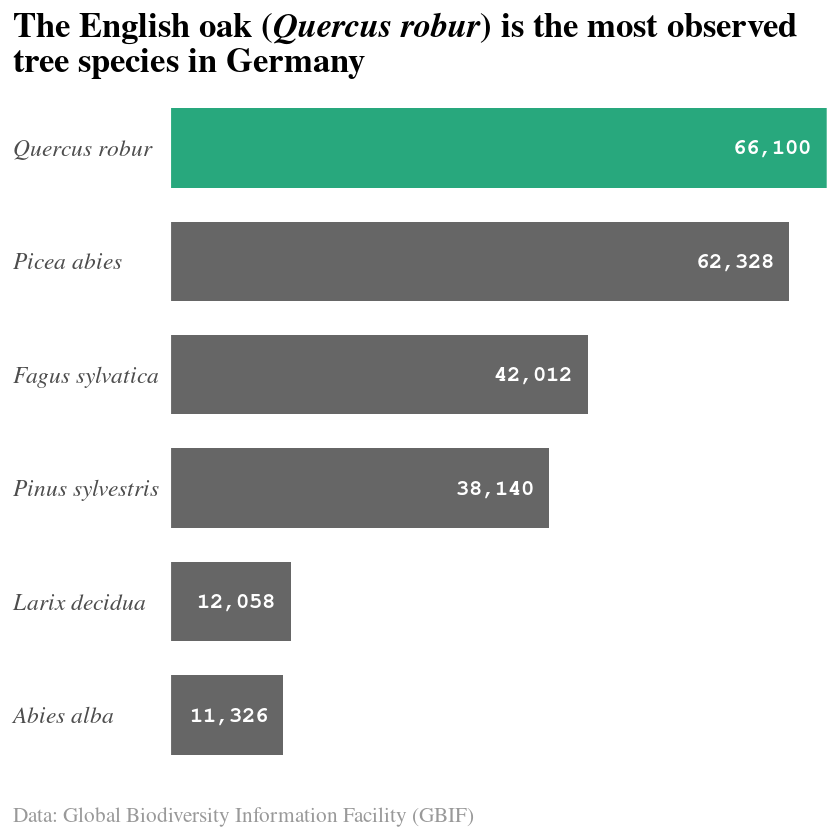

In [63]:
g +
  stat_count(
    geom = "text",
    aes(label = after_stat(format(count, big.mark = ","))),
    hjust = 1.2,
    family = "Courier",
    color = "white",
    fontface = "bold",
    size = 4.7
  ) +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    limits = c(0, NA),
    guide = "none",
    name = NULL
  ) +
  labs(title = "The English oak (*Quercus robur*) is the most observed tree species in Germany") +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text.y = element_text(face = "italic", hjust = 0, size = rel(1.1)),
    plot.caption = element_text(color = "grey60", hjust = 0, margin = margin(t = 15)),
    plot.caption.position = "plot",
    plot.title = ggtext::element_textbox_simple(face = "bold", size = rel(1.3), lineheight = 1),
    plot.title.position = "plot"
  )

Finally, we can use the color encoding in the title as well to emphasize the main finding and to reduce the time and kongitive load to interpret the visualization:

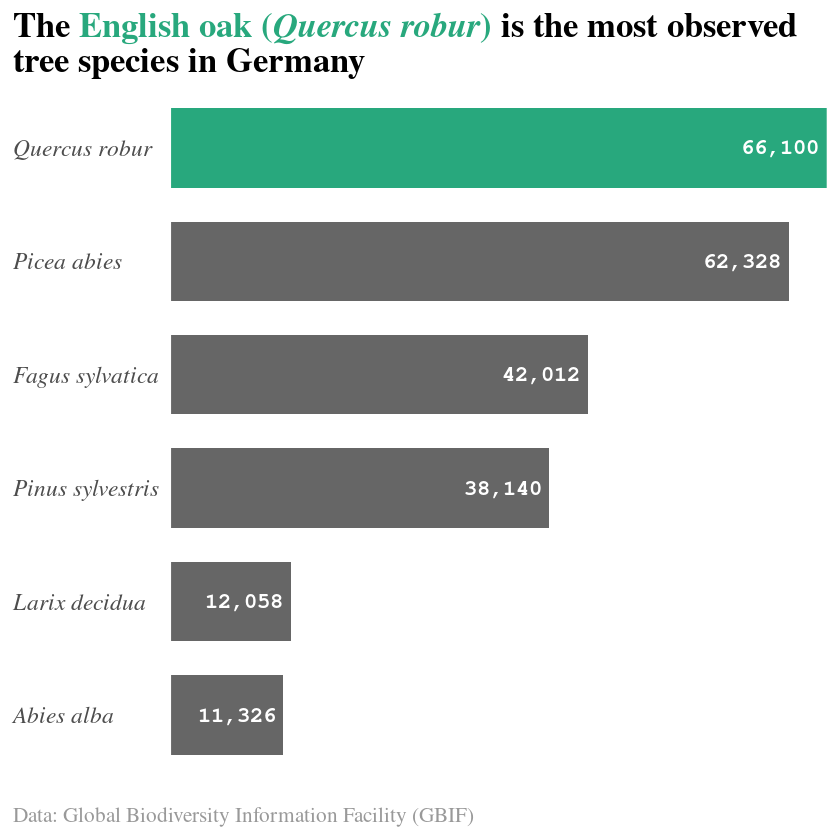

In [64]:
g +
  stat_count(
    geom = "text",
    aes(label = after_stat(format(count, big.mark = ","))),
    hjust = 1.1,
    family = "Courier",
    color = "white",
    fontface = "bold",
    size = 4.7
  ) +
  scale_x_continuous(
    expand = expansion(add = c(0, .5)),
    limits = c(0, NA),
    guide = "none",
    name = NULL
  ) +
  labs(title = "The <span style='color:#28A87D;font-weight:700;'>English oak (*Quercus robur*)</span> is the most observed tree species in Germany") +
  theme(
    panel.grid.minor = element_blank(),
    panel.grid.major = element_blank(),
    axis.text.y = element_text(face = "italic", hjust = 0, size = rel(1.1)),
    plot.caption = element_text(color = "grey60", hjust = 0, margin = margin(t = 15)),
    plot.caption.position = "plot",
    plot.title = ggtext::element_textbox_simple(face = "bold", size = rel(1.3), lineheight = 1),
    plot.title.position = "plot"
  )

### Export the Graphic

In [65]:
## save stored plot
ggsave(filename = "my_plot.png", plot = g)

## save last plot (with implicit matching of `filename`)
ggsave("my_plot.png")

## save last plot with custom settings
ggsave("my_plot.png", width = 6.7, height = 5, dpi = 600)

## save last plot with custom unit
ggsave("my_plot.png", width = 17.02, height = 12.7, unit = "cm", dpi = 600)

## save last plot as PDF file
ggsave("my_plot.pdf", width = 6.7, height = 5, device = cairo_pdf)

## save last plot as SVG file
ggsave("my_plot.svg", width = 6.7, height = 5)

Saving 7 x 7 in image
Saving 7 x 7 in image


## List of Exciting Extension Packages

### Layers

+ [**`{geofacet}`**](https://hafen.github.io/geofacet/) — tile grid maps
+ [**`{ggalluvial}`**](https://github.com/hrbrmstr/ggalt) — alluvial plots
+ [**`{ggalt}`**](https://github.com/hrbrmstr/ggalt) — dumbbell, horizon, and lollipop charts, splines, ...
+ [**`{ggbeeswarm}`**](https://github.com/hrbrmstr/ggalt) — beeswarm plots and variants
+ [**`{ggbraid}`**](https://nsgrantham.github.io/ggbraid/) — ribbons for alternating groups
+ [**`{ggbump}`**](https://github.com/davidsjoberg/ggbump) — bump charts
+ [**`{ggdensity}`**](https://jamesotto852.github.io/ggdensity/) — improved density plots
+ [**`{ggdist}`**](https://github.com/davidsjoberg/ggbump) — uncertainty visualizations
+ [**`{ggforce}`**](https://ggforce.data-imaginist.com/) — several interesting layers (and more)
+ [**`{ggpattern}`**](https://github.com/coolbutuseless/ggpattern) — pattern fills for layers


## Exciting Extension: Layers Pt. 2

+ [**`{ggpointdensity}`**](https://github.com/LKremer/ggpointdensity) — density gradients for scatter plots
+ [**`{ggraph}`**](https://github.com/thomasp85/ggraph) — networks, graphs & trees
+ [**`{ggridges}`**](https://github.com/clauswilke/ggridges) — ridgeline plots
+ [**`{ggsankey}`**](https://github.com/davidsjoberg/ggsankey) — sankey diagrams
+ [**`{ggsignif}`**](https://const-ae.github.io/ggsignif/) — significance levels
+ [**`{ggstar}`**](https://github.com/xiangpin/ggstar) — more point shapes
+ [**`{ggstream}`**](https://github.com/davidsjoberg/ggstream) — stream graphs
+ [**`{ggupset}`**](https://github.com/const-ae/ggupset) — upset graphs
+ [**`{treemapify}`**](https://wilkox.org/treemapify/) — treemaps


## Exciting Extension: Utilities

+ [**`{cowplot}`**](https://cran.r-project.org/web/packages/cowplot/vignettes/introduction.html) — combine ggplots
+ [**`{ggannotate}`**](https://github.com/MattCowgill/ggannotate) — point-n-click annotations
+ [**`{ggblend}`**](https://mjskay.github.io/ggblend/) — blend, compose, adjust layers
+ [**`{ggfittext}`**](https://wilkox.org/ggfittext/) — scale text according to space
+ [**`{ggfx}`**](https://ggfx.data-imaginist.com/) — shaders and filters for layers
+ [**`{ggh4x}`**](https://teunbrand.github.io/ggh4x/) — facets, positions, and more
+ [**`{ggtext}`**](https://wilkelab.org/ggtext/) — text rendering for theme elements + text layers
+ [**`{lemon}`**](https://github.com/stefanedwards/lemon) — axis lines (and a few layers)
+ [**`{marquee}`**](https://marquee.r-lib.org/) — advanced Markdown rendering
+ [**`{patchwork}`**](https://github.com/thomasp85/patchwork) — combine ggplots
+ [**`{scales}`**](https://scales.r-lib.org/) — control scales 


## Exciting Extension: Themes

+ [**`{ggdark}`**](https://github.com/nsgrantham/ggdark)
+ [**`{ggsci}`**](https://github.com/jrnold/ggthemes) (also color scales)
+ [**`{ggtech}`**](https://github.com/ricardo-bion/ggtech) (also color scales)
+ [**`{ggthemes}`**](https://github.com/jrnold/ggthemes) (also color scales)
+ [**`{ggthemr}`**](https://github.com/Mikata-Project/ggthemr)
+ [**`{hrbrthemes}`**](https://github.com/hrbrmstr/hrbrthemes) (also color scales)
+ [**`{tvthemes}`**](https://ryo-n7.github.io/tvthemes/) (also color scales)


## Exciting Extension: Colors

+ [**`{colorspace}`**](https://cran.r-project.org/web/packages/colorspace/vignettes/colorspace.html)
+ [**`{jcolors}`**](https://jaredhuling.org/jcolors/)
+ [**`{MetBrewer}`**](https://github.com/BlakeRMills/MetBrewer)
+ [**`{nord}`**](https://cran.r-project.org/web/packages/nord/readme/README.html)
+ [**`{rcartocolor}`**](https://jakubnowosad.com/rcartocolor/)
+ [**`{RColorBrewer}`**](https://cran.r-project.org/web/packages/RColorBrewer/index.html)
+ [**`{scico}`**](https://github.com/thomasp85/scico)
+ [**`{unikn}`**](https://github.com/hneth/unikn)
+ [**`{viridis}`**](https://cran.r-project.org/web/packages/viridis/vignettes/intro-to-viridis.html)
+ [**`{wesanderson}`**](https://github.com/karthik/wesanderson)


## Exciting Extension: Interactive Charts

+ [**`{ggiraph}`**](https://davidgohel.github.io/ggiraph/)
+ [**`{plotly}`**](https://plotly.com/r/)
+ [**`{echarts4r}`**](https://echarts4r.john-coene.com/)*
+ [**`{highcharter}`**](https://jkunst.com/highcharter/)*
+ [**`{charter}`**](https://github.com/JohnCoene/charter)*
+ [**`{streamgraph}`**](https://hrbrmstr.github.io/streamgraph/)*
+ [**`{tmap}`**](https://cran.r-project.org/web/packages/tmap/vignettes/tmap-getstarted.html)*
+ [**`{leaflet}`**](https://rstudio.github.io/leaflet/)*
+ [**`{globe4r}`**](https://globe4r.john-coene.com/)*
+ [**`{grapher}`**](https://grapher.network/)*

<span style='font-size:.9em;'>* not using <code>ggplot2</code>